In [1]:
from scprint import scPrint
from scdataloader import Preprocessor
from scprint.tasks import GRNfer

from bengrn import BenGRN, get_sroy_gt
import scanpy as sc
from grnndata import GRNAnnData, read_h5ad, from_anndata


import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import train_test_split

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3, compute_scenic
from grnndata import utils as grnutils

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(
2024-05-13 18:16:11,918:INFO - Downloading data from `https://omnipathdb.org/queries/enzsub?format=json`
2024-05-13 18:16:12,045:INFO - Downloading data from `https://omnipathdb.org/queries/interactions?format=json`
2024-05-13 18:16:12,135:INFO - Downloading data from `https://omnipathdb.org/queries/complexes?format=json`
2024-05-13 18:16:12,227:INFO - Downloading data from `https://omnipathdb.org/queries/annotations?format=json`
2024-05-13 18:16:12,314:INFO - Downloading data from `https://omnipathdb.org/queries/intercell?format=json`
2024-05-13 18:16:12,533:INFO - Downloading data from `https://omnipathdb.org/about?format=text`
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/arboreto/core.py:12: DeprecationWarning: The current Dask DataFrame implementation is deprecated. 
In a future release, Dask D

In [ ]:
model = scPrint.load_from_checkpoint('../../data/temp/vbd8bavn/epoch=17-step=90000.ckpt', precpt_gene_emb = None)#'../../data/main/gene_embeddings.parquet')

In [ ]:
preprocessor = Preprocessor(is_symbol=True, force_preprocess=True, skip_validate=True, do_postp=False, min_valid_genes_id=5000, min_dataset_size=64)

# liu / full

In [ ]:
preadata = get_sroy_gt(get="liu", species="human", gt="full")
adata = preprocessor(preadata.copy())
adata.var["isTF"]=False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"]=True
preadata, (preadata.grn.sum(1)!=0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 72 renamining
filtered out 0 cells, 72 renamining
Removed 0 genes.
startin QC
Seeing 4 outliers (5.56% of total dataset):
done


(GRnnData object with n_obs × n_vars = 72 × 23153
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 10537 elements,
 33)

/tmp/ipykernel_922237/3682888595.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


number of expressed genes in this cell type: 16786


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  ) < LooseVersion("1.15"):
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical
/home/ml4ig1/Documents code/benGRN/bengrn/base.py:265: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(genes), len(genes)), dtype=np.float)


true elem 27976 ...
doing regression....
metrics {'used_heads': 23, 'precision': 0.001451378809869376, 'random_precision': 0.0010592597392528023, 'recall': 0.0003536067892503536, 'predicted_true': 689.0, 'number_of_true': 2828.0, 'epr': 2.680087520748453}


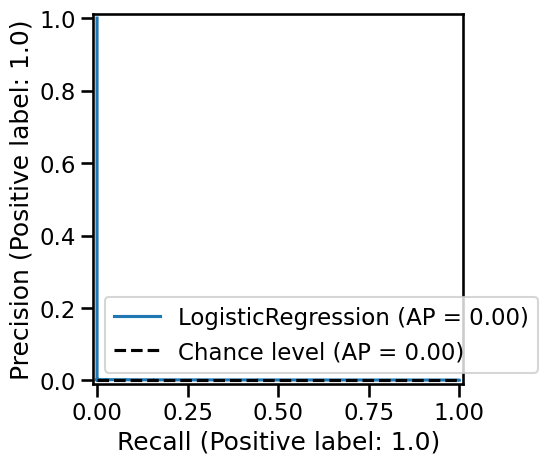

: 

In [5]:
grn_inferer = GRNfer(model, adata,
    how="most var within",
    preprocess="softmax",
    head_agg='none',
    filtration="none",
    forward_mode="none",
    organisms=adata.obs['organism_ontology_term_id'][0],
    apc=False,
    symmetrize=False,
    num_genes=8000,
    max_cells=64,
    doplot=False,
    batch_size=32,
)
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn, m, clf = train_classifier(grn, C=0.1, train_size=0.9, class_weight={1: 200, 0: 1}, shuffle=True)
grn.varp['all'] = grn.varp['GRN']
grn.varp['GRN'] = grn.varp['classified']
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn.varp['GRN'] = grn.varp['all']
grn.var.index = grn.var['ensembl_id']
grn, m, _ = train_classifier(grn, other=preadata, C=0.1, train_size=0.3, class_weight={1: 100, 0: 1}, shuffle=False)
grn.varp['GRN'] = grn.varp['classified']
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)


Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 56.27 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.030921665115041894 
recall:  0.7474167623421355 
random precision: 0.024947012659678067


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: invalid value encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1218.24it/s]


Area Under Precision-Recall Curve (AUPRC):  0.03592405421747312
EPR: 2.1800448293455887


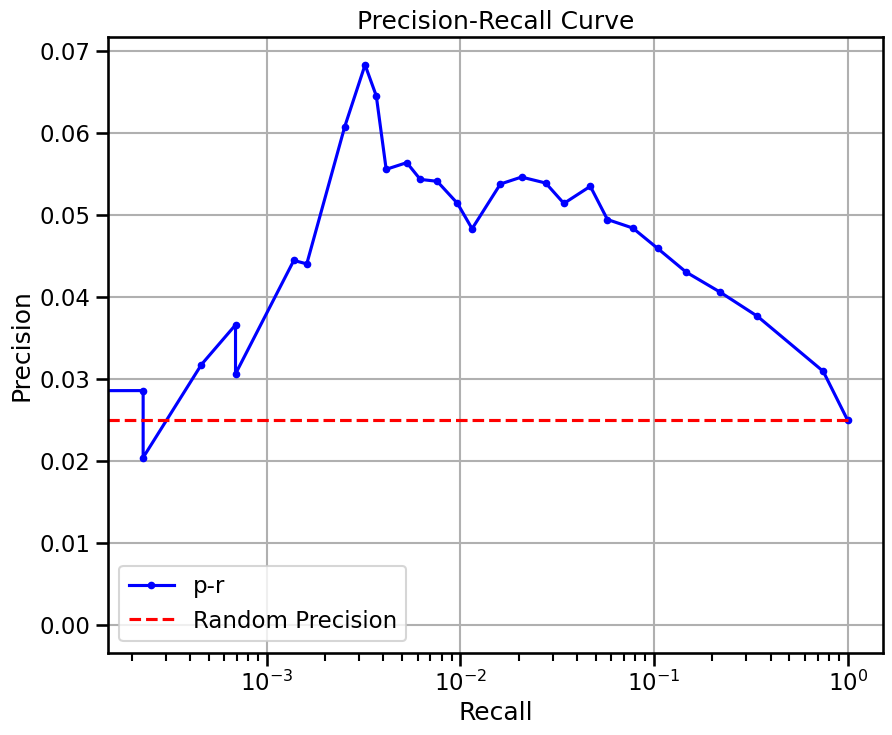

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 83.49 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.027294778501212816 
recall:  0.2454649827784156 
random precision: 0.024947012659678067


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: invalid value encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1380.28it/s]


Area Under Precision-Recall Curve (AUPRC):  0.028408844612221963
EPR: 1.7146373122019434


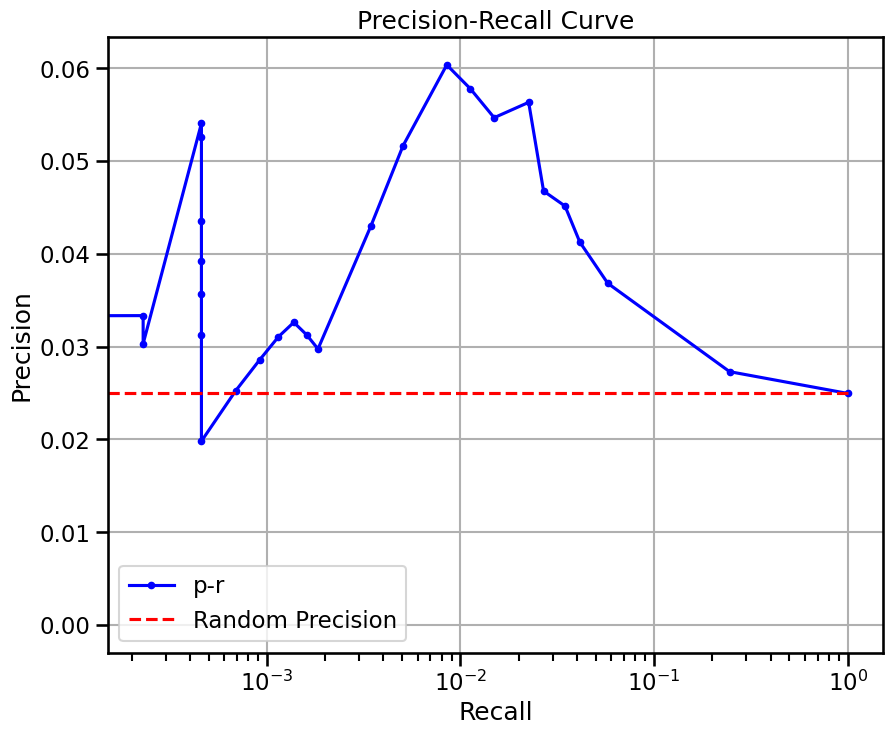

{'precision': 0.027294778501212816,
 'recall': 0.2454649827784156,
 'rand_precision': 0.024947012659678067,
 'auprc': 0.028408844612221963,
 'EPR': 1.7146373122019434}

In [16]:
grn = compute_genie3(adata[:, adata.var.index.isin(grn_inferer.curr_genes)], nthreads=32, regulators=adata.var[adata.var.isTF].index.tolist())
m = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)
print(m)

grn = compute_genie3(adata[:, adata.var.index.isin(grn_inferer.curr_genes)], nthreads=32)
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

/tmp/ipykernel_538653/791458349.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


number of expressed genes in this cell type: 16786


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 57744801, sparsity: 1.0


... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.024943726266230606 
recall:  1.0 
random precision: 0.024947012659678067


  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1622.25it/s]


Area Under Precision-Recall Curve (AUPRC):  0.02485766623336104
EPR: 0.9358754741884527


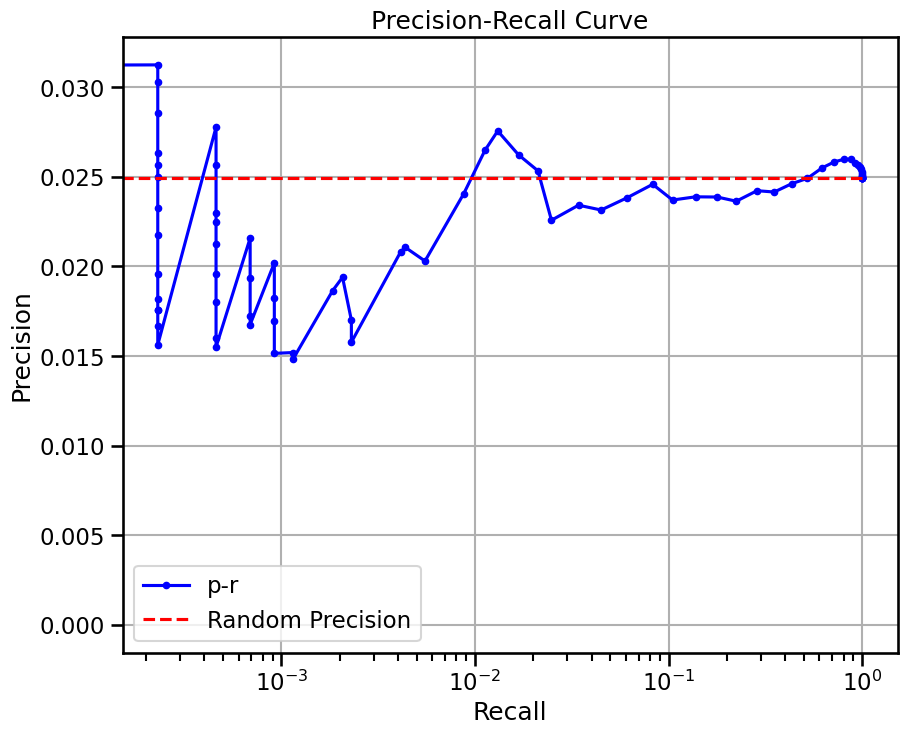

{'precision': 0.024943726266230606,
 'recall': 1.0,
 'rand_precision': 0.024947012659678067,
 'auprc': 0.02485766623336104,
 'EPR': 0.9358754741884527}

In [17]:
grn_inferer = GRNfer(model, adata,
    how="most var within",
    preprocess="softmax",
    head_agg='max',
    filtration="none",
    forward_mode="none",
    organisms=adata.obs['organism_ontology_term_id'][0],
    apc=False,
    symmetrize=False,
    num_genes=8000,
    max_cells=64,
    doplot=False,
    batch_size=32,
)
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

# liu / chip

In [ ]:
preadata = get_sroy_gt(get="liu", species="human", gt="chip")
adata = preprocessor(preadata.copy())
adata.var["isTF"]=False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"]=True
preadata, (preadata.grn.sum(1)!=0).sum()

NameError: name 'get_sroy_gt' is not defined

/tmp/ipykernel_538653/4026278613.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


number of expressed genes in this cell type: 16786


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical
/home/ml4ig1/Documents code/benGRN/bengrn/base.py:265: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(genes), len(genes)), dtype=np.float)


true elem 27976 ...
doing regression....
metrics {'used_heads': 16, 'precision': 0.0, 'random_precision': 0.0010112623667477628, 'recall': 0.0, 'predicted_true': 403.0, 'number_of_true': 18899.0, 'epr': 2.202930444067625}


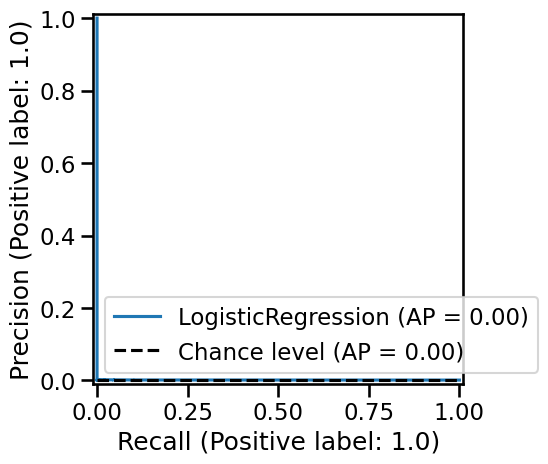

precision:  0.2642656851964867 
recall:  1.0 
random precision: 0.2643005028098196


 90%|████████▉ | 89/99 [00:00<00:00, 179.04it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 172.88it/s]


Area Under Precision-Recall Curve (AUPRC):  0.2946773105570196
EPR: 0.7918641083875432


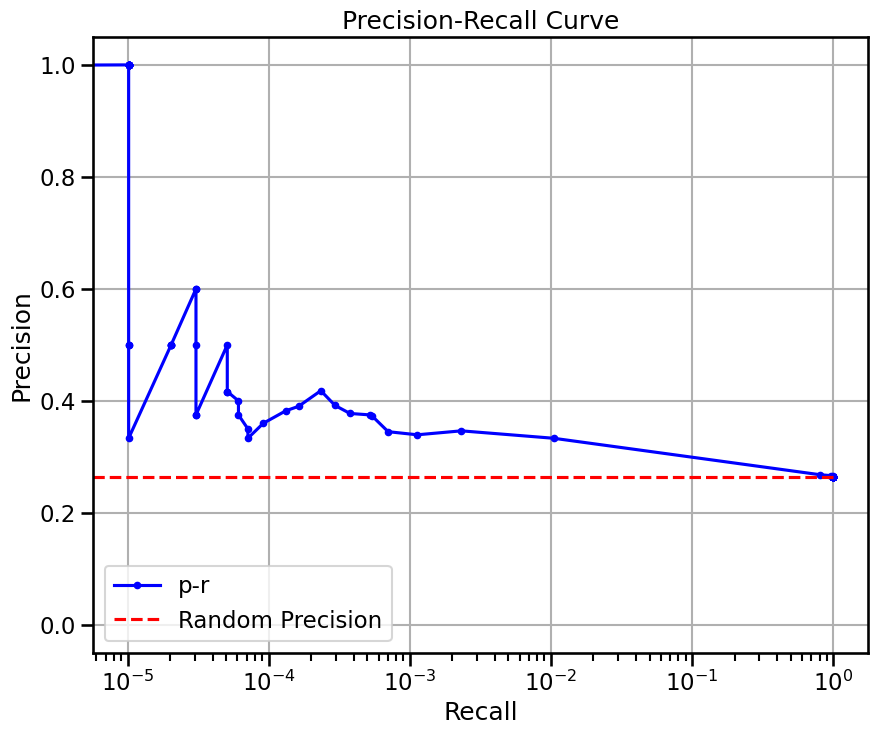

pred shape (49, 7591, 32)
true elem 98296 ...
doing regression....
metrics {'used_heads': 0, 'precision': 0.26874241469896915, 'random_precision': 0.26874241469896915, 'recall': 1.0, 'predicted_true': 260372.0, 'number_of_true': 69973.0, 'epr': 0.8814846852888386}


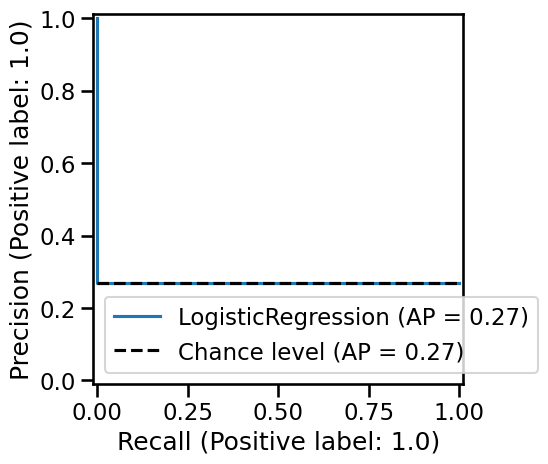

precision:  0.2642656851964867 
recall:  1.0 
random precision: 0.2643005028098196


  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 253.49it/s]


Area Under Precision-Recall Curve (AUPRC):  0.13213284259824334
EPR: 1.1285332706224418


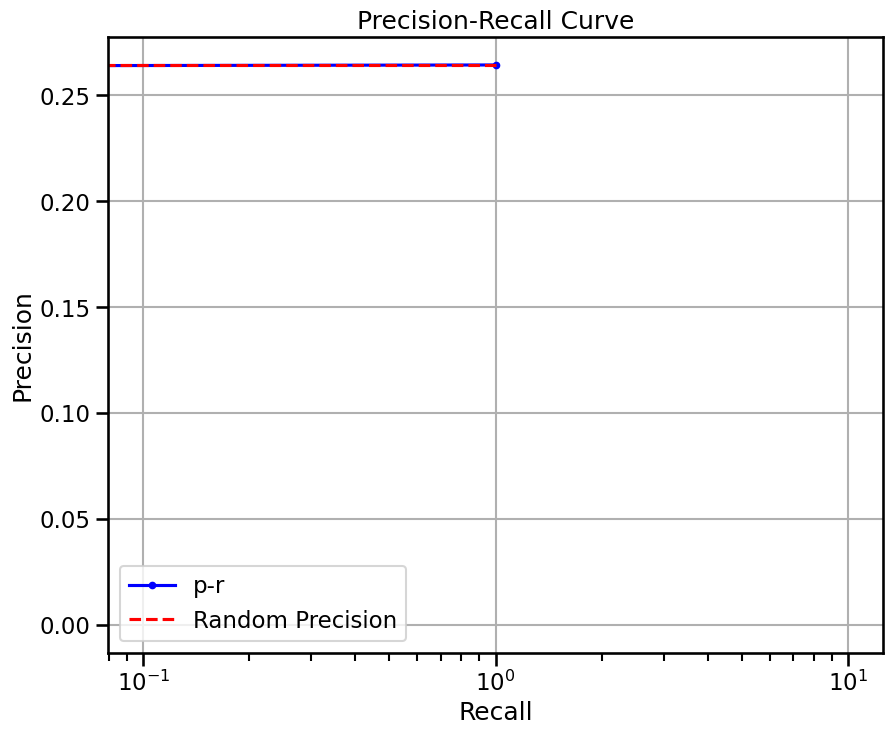

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 53.81 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.2710241914149381 
recall:  0.5628102872955156 
random precision: 0.2643005028098196


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: invalid value encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
 37%|███▋      | 37/99 [00:00<00:00, 363.15it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 360.89it/s]


Area Under Precision-Recall Curve (AUPRC):  0.2864917418534139
EPR: 1.3373138421234005


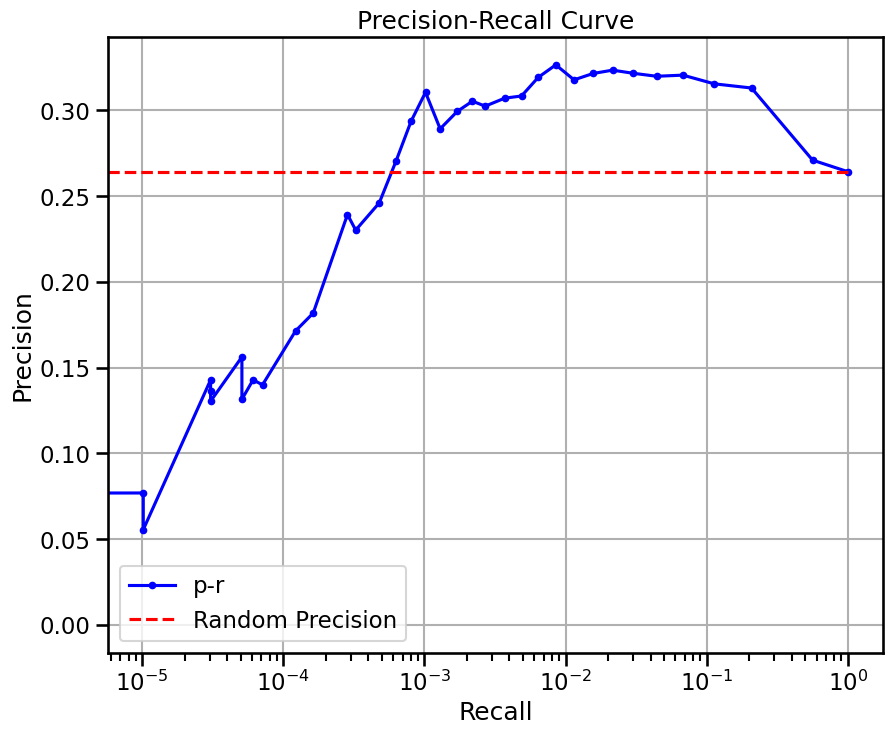

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 79.34 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.35231043590148764 
recall:  0.31755107023683565 
random precision: 0.2643005028098196


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: invalid value encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
 26%|██▋       | 26/99 [00:00<00:00, 254.57it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 306.10it/s]


Area Under Precision-Recall Curve (AUPRC):  0.3168185034745818
EPR: 1.748142322974763


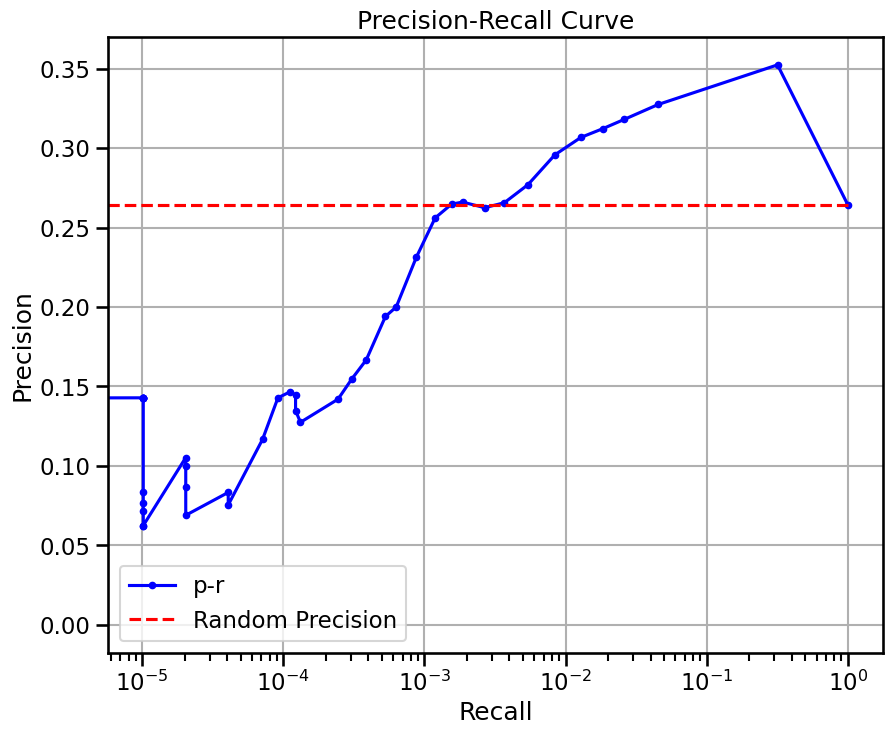

{'precision': 0.35231043590148764,
 'recall': 0.31755107023683565,
 'rand_precision': 0.2643005028098196,
 'auprc': 0.3168185034745818,
 'EPR': 1.748142322974763}

In [ ]:
grn_inferer = GRNfer(model, adata,
    how="most var within",
    preprocess="softmax",
    head_agg='none',
    filtration="none",
    forward_mode="none",
    organisms=adata.obs['organism_ontology_term_id'][0],
    apc=False,
    symmetrize=False,
    num_genes=8000,
    max_cells=64,
    doplot=False,
    batch_size=32,
)
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.varp["classified"] = clf.predict_proba(
    grn.varp['GRN'].reshape(-1, grn.varp['GRN'].shape[-1])
).reshape(len(grn.var), len(grn.var), 2)[:, :, 1]
grn.varp['all'] = grn.varp['GRN']
grn.varp['GRN'] = grn.varp['classified']
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn.varp['GRN'] = grn.varp['all']
grn.var.index = grn.var['ensembl_id']
grn, m, _ = train_classifier(grn, other=preadata, C=0.1, train_size=0.3, class_weight={1: 100, 0: 1}, shuffle=False)
grn.varp['GRN'] = grn.varp['classified']
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)


In [ ]:
grn = compute_genie3(adata[:, adata.var.index.isin(grn_inferer.curr_genes)], nthreads=32, regulators=adata.var[adata.var.isTF].index.tolist())
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn = compute_genie3(adata[:, adata.var.index.isin(grn_inferer.curr_genes)], nthreads=32)
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

/tmp/ipykernel_538653/791458349.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


number of expressed genes in this cell type: 16786


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 57744801, sparsity: 1.0


... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.2642656851964867 
recall:  1.0 
random precision: 0.2643005028098196


 65%|██████▍   | 64/99 [00:00<00:00, 326.40it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 333.43it/s]


Area Under Precision-Recall Curve (AUPRC):  0.2726060846815215
EPR: 1.0725466302284064


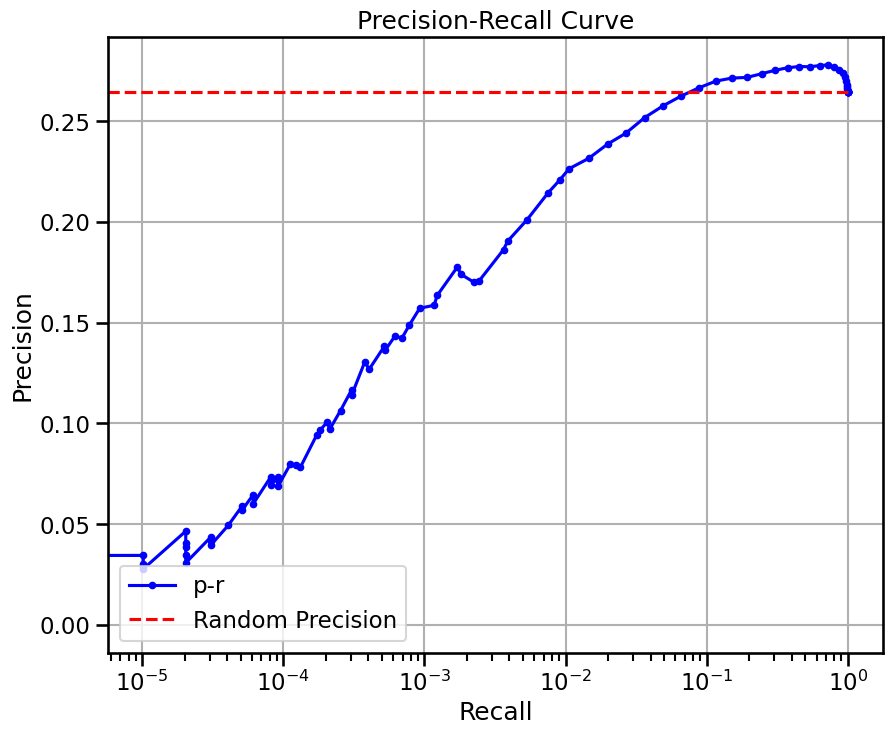

{'precision': 0.2642656851964867,
 'recall': 1.0,
 'rand_precision': 0.2643005028098196,
 'auprc': 0.2726060846815215,
 'EPR': 1.0725466302284064}

In [20]:
grn_inferer = GRNfer(model, adata,
    how="most var within",
    preprocess="softmax",
    head_agg='max',
    filtration="none",
    forward_mode="none",
    organisms=adata.obs['organism_ontology_term_id'][0],
    apc=False,
    symmetrize=False,
    num_genes=8000,
    max_cells=64,
    doplot=False,
    batch_size=32,
)
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

## liu / ko

In [24]:
preadata = get_sroy_gt(get="liu", species="human", gt="ko")
adata = preprocessor(preadata.copy())
adata.var["isTF"]=False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"]=True
preadata, (preadata.grn.sum(1)!=0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 72 renamining
filtered out 0 cells, 72 renamining
Removed 0 genes.
startin QC
Seeing 4 outliers (5.56% of total dataset):
done


(GRnnData object with n_obs × n_vars = 72 × 23153
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 108194 elements,
 157)

/tmp/ipykernel_609134/1494898899.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


number of expressed genes in this cell type: 16786


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.056188656288715645 
recall:  1.0 
random precision: 0.05619605927373392


 79%|███████▉  | 78/99 [00:00<00:00, 198.51it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 192.50it/s]


Area Under Precision-Recall Curve (AUPRC):  0.05202766250661954
EPR: 0.7804230324966615


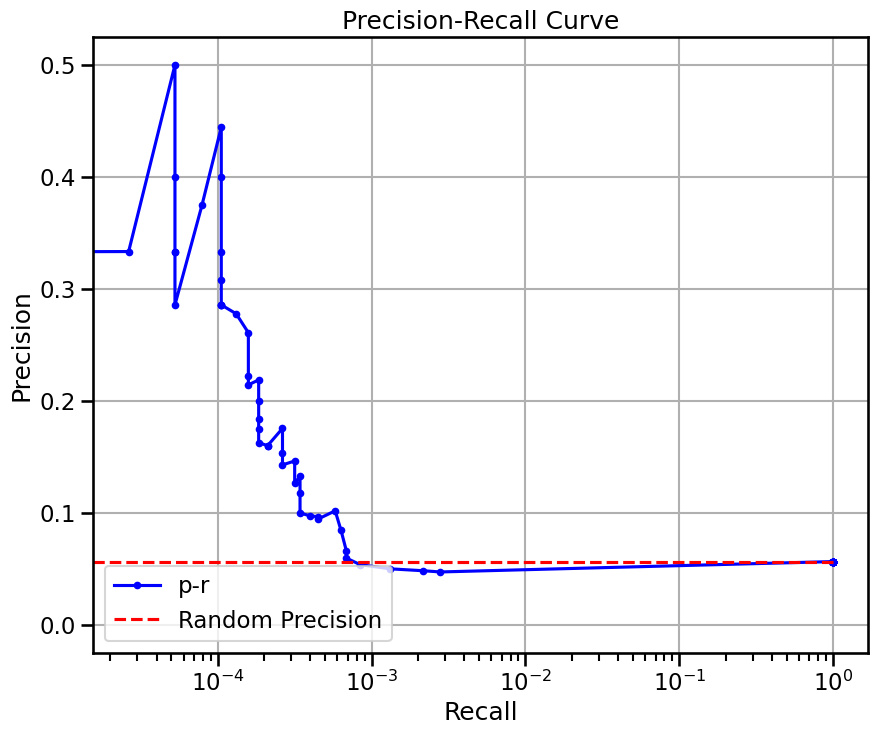

{'precision': 0.056188656288715645,
 'recall': 1.0,
 'rand_precision': 0.05619605927373392,
 'auprc': 0.05202766250661954,
 'EPR': 0.7804230324966615}

In [25]:
grn_inferer = GRNfer(model, adata,
    how="most var within",
    preprocess="softmax",
    head_agg='none',
    filtration="none",
    forward_mode="none",
    organisms=adata.obs['organism_ontology_term_id'][0],
    apc=False,
    symmetrize=False,
    num_genes=8000,
    max_cells=64,
    doplot=False,
    batch_size=32,
)
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.varp["classified"] = clf.predict_proba(
    grn.varp['GRN'].reshape(-1, grn.varp['GRN'].shape[-1])
).reshape(len(grn.var), len(grn.var), 2)[:, :, 1]
grn.varp['all'] = grn.varp['GRN']
grn.varp['GRN'] = grn.varp['classified']
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

/tmp/ipykernel_538653/4026278613.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


number of expressed genes in this cell type: 16786


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical
/home/ml4ig1/Documents code/benGRN/bengrn/base.py:265: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(genes), len(genes)), dtype=np.float)


true elem 27976 ...
doing regression....
metrics {'used_heads': 16, 'precision': 0.0, 'random_precision': 0.0010112623667477628, 'recall': 0.0, 'predicted_true': 403.0, 'number_of_true': 18899.0, 'epr': 2.202930444067625}


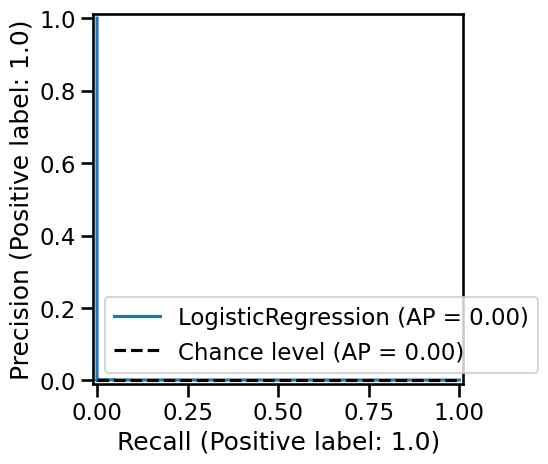

precision:  0.056188656288715645 
recall:  1.0 
random precision: 0.05619605927373392


 87%|████████▋ | 86/99 [00:00<00:00, 308.05it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 287.26it/s]


Area Under Precision-Recall Curve (AUPRC):  0.062301190903033266
EPR: 1.1511694873000315


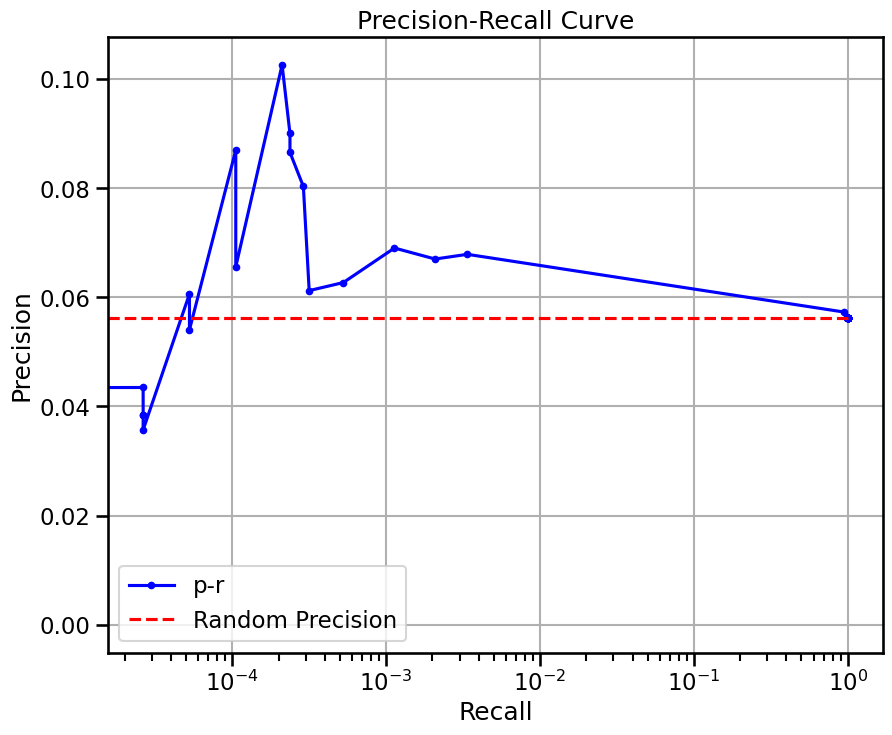

pred shape (89, 7591, 32)
true elem 37961 ...
doing regression....
metrics {'used_heads': 6, 'precision': 0.05561312973224483, 'random_precision': 0.055601370210606446, 'recall': 1.0, 'predicted_true': 472820.0, 'number_of_true': 26295.0, 'epr': 1.0632724382426848}


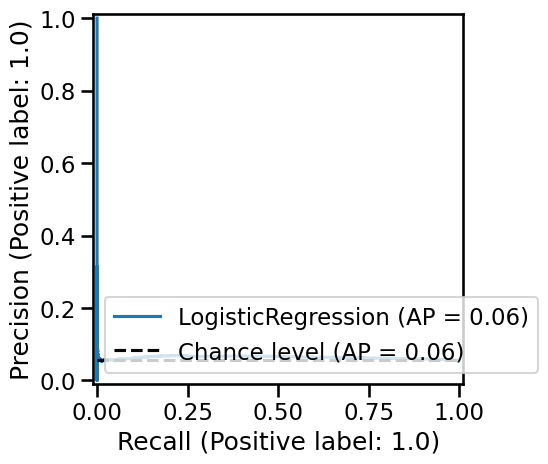

precision:  0.056188656288715645 
recall:  1.0 
random precision: 0.05619605927373392


 84%|████████▍ | 83/99 [00:00<00:00, 303.40it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 285.12it/s]


Area Under Precision-Recall Curve (AUPRC):  0.07091315150422199
EPR: 0.9169301540609607


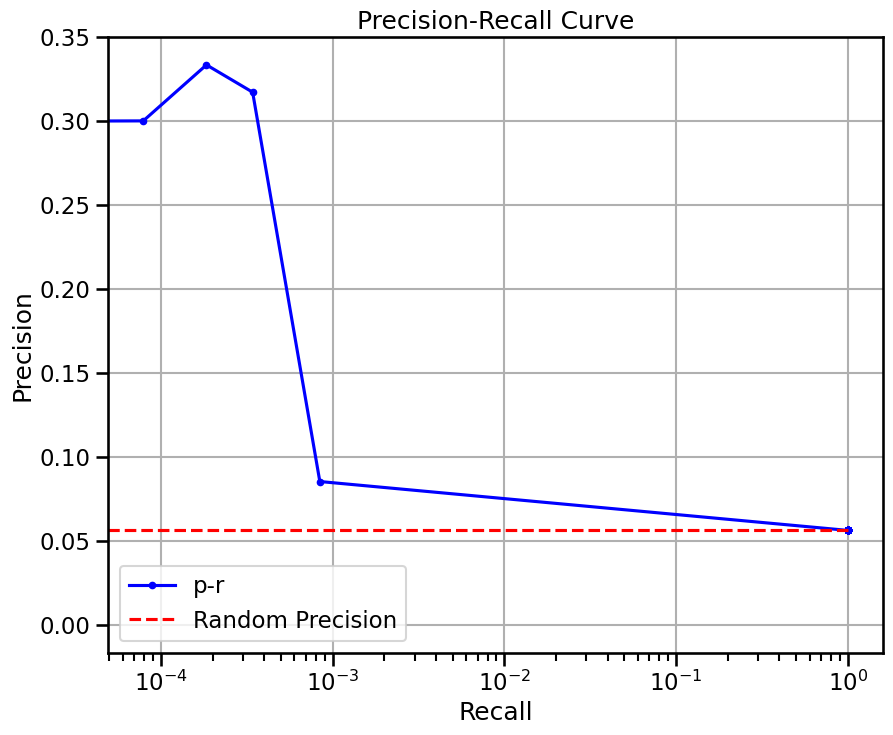

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 63.83 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.07464654804716084 
recall:  0.502515739838255 
random precision: 0.05619605927373392


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: invalid value encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
 32%|███▏      | 32/99 [00:00<00:00, 318.95it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 361.36it/s]


Area Under Precision-Recall Curve (AUPRC):  0.07617342907804883
EPR: 1.8541013266139723


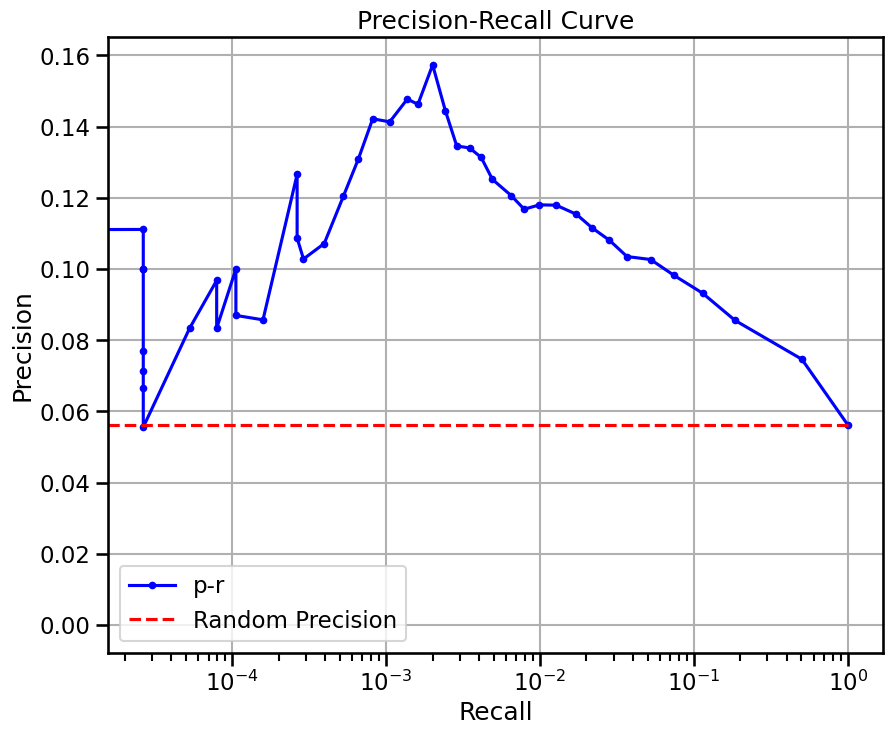

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 82.12 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.041379362544372876 
recall:  0.1440162271805274 
random precision: 0.05619605927373392


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: invalid value encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
 22%|██▏       | 22/99 [00:00<00:00, 217.86it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 321.05it/s]


Area Under Precision-Recall Curve (AUPRC):  0.049661787059364415
EPR: 0.9102141890432098


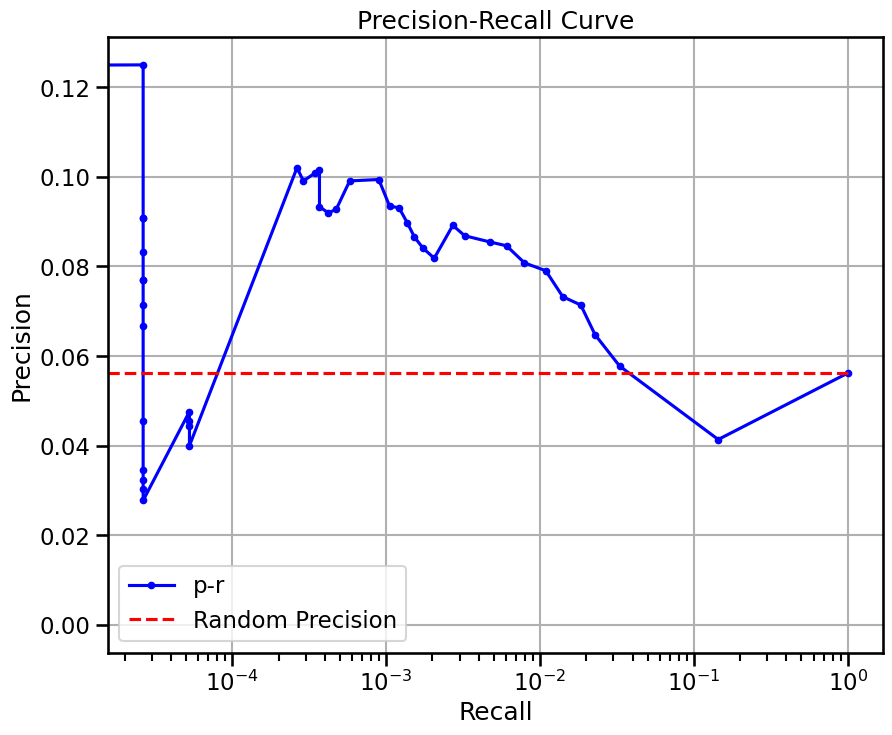

{'precision': 0.041379362544372876,
 'recall': 0.1440162271805274,
 'rand_precision': 0.05619605927373392,
 'auprc': 0.049661787059364415,
 'EPR': 0.9102141890432098}

In [22]:
grn_inferer = GRNfer(model, adata,
    how="most var within",
    preprocess="softmax",
    head_agg='none',
    filtration="none",
    forward_mode="none",
    organisms=adata.obs['organism_ontology_term_id'][0],
    apc=False,
    symmetrize=False,
    num_genes=8000,
    max_cells=64,
    doplot=False,
    batch_size=32,
)
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.varp["classified"] = clf.predict_proba(
    grn.varp['GRN'].reshape(-1, grn.varp['GRN'].shape[-1])
).reshape(len(grn.var), len(grn.var), 2)[:, :, 1]
grn.varp['all'] = grn.varp['GRN']
grn.varp['GRN'] = grn.varp['classified']
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn.varp['GRN'] = grn.varp['all']
grn.var.index = grn.var['ensembl_id']
grn, m, _ = train_classifier(grn, other=preadata, C=0.1, train_size=0.3, class_weight={1: 100, 0: 1}, shuffle=False)
grn.varp['GRN'] = grn.varp['classified']
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn = compute_genie3(adata[:, adata.var.index.isin(grn_inferer.curr_genes)], nthreads=32, regulators=adata.var[adata.var.isTF].index.tolist())
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn = compute_genie3(adata[:, adata.var.index.isin(grn_inferer.curr_genes)], nthreads=32)
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)


/tmp/ipykernel_538653/791458349.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


number of expressed genes in this cell type: 16786


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 57744801, sparsity: 1.0


... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.056188656288715645 
recall:  1.0 
random precision: 0.05619605927373392


 64%|██████▎   | 63/99 [00:00<00:00, 328.35it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 340.09it/s]


Area Under Precision-Recall Curve (AUPRC):  0.05119950321680865
EPR: 0.8081068869997863


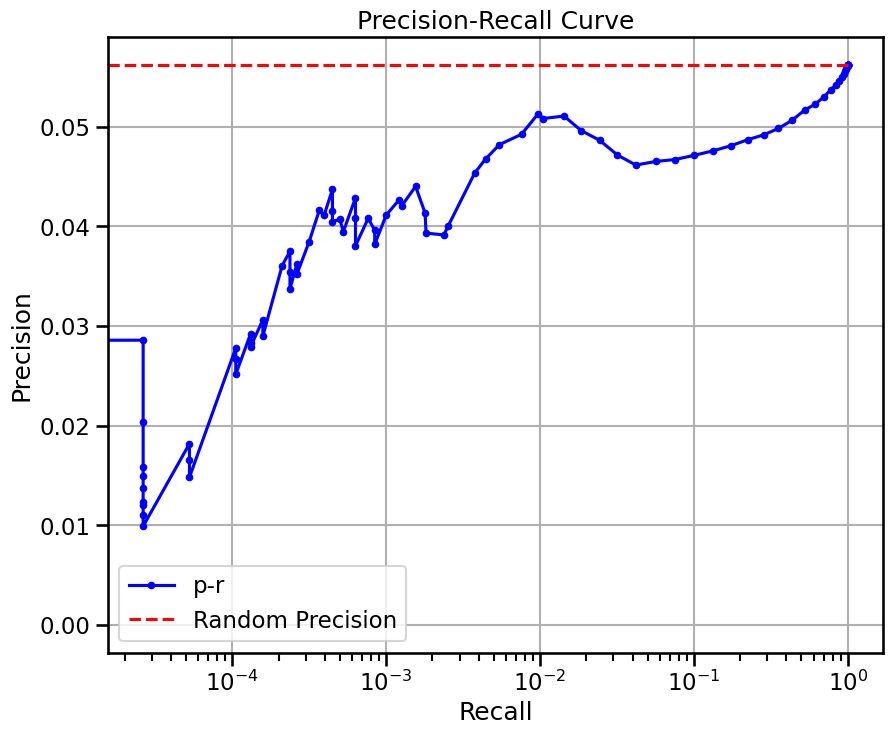

{'precision': 0.056188656288715645,
 'recall': 1.0,
 'rand_precision': 0.05619605927373392,
 'auprc': 0.05119950321680865,
 'EPR': 0.8081068869997863}

In [23]:
grn_inferer = GRNfer(model, adata,
    how="most var within",
    preprocess="softmax",
    head_agg='max',
    filtration="none",
    forward_mode="none",
    organisms=adata.obs['organism_ontology_term_id'][0],
    apc=False,
    symmetrize=False,
    num_genes=8000,
    max_cells=64,
    doplot=False,
    batch_size=32,
)
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

# chen / all

In [22]:
preadata = get_sroy_gt(get="chen", species="human", gt="full")
adata = preprocessor(preadata.copy())
adata.var["isTF"]=False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"]=True
preadata, (preadata.grn.sum(1)!=0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 385 renamining
filtered out 0 cells, 385 renamining
Removed 0 genes.
startin QC
Seeing 38 outliers (9.87% of total dataset):
done


(GRnnData object with n_obs × n_vars = 385 × 8595
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 2969 elements,
 19)

/tmp/ipykernel_538653/4026278613.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


number of expressed genes in this cell type: 6519


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'symbol' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'description' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical
/home/ml4ig1/Documents code/benGRN/bengrn/base.py:265: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(genes), len(genes)), dtype=np.float)


true elem 1904 ...
doing regression....
metrics {'used_heads': 9, 'precision': 0.0, 'random_precision': 0.0007269748757980852, 'recall': 0.0, 'predicted_true': 157.0, 'number_of_true': 1168.0, 'epr': 8.331573586285844}


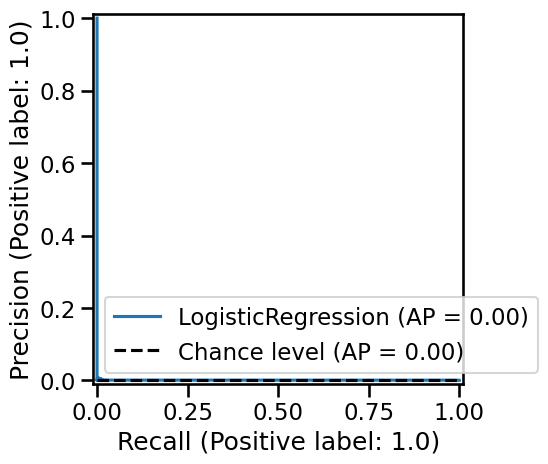

precision:  0.03335318642048839 
recall:  1.0 
random precision: 0.033373063170441


  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 14358.09it/s]


Area Under Precision-Recall Curve (AUPRC):  0.10178817905345747
EPR: 6.416930737890448


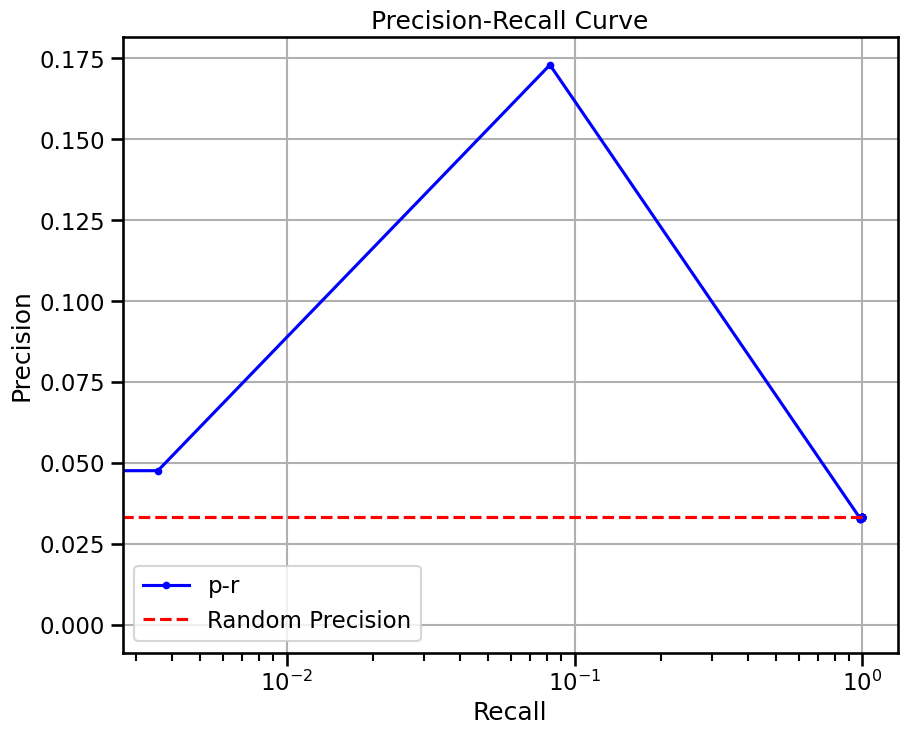

pred shape (5, 1679, 32)
true elem 280 ...
doing regression....
metrics {'used_heads': 0, 'precision': 0.005274800068061937, 'random_precision': 0.005274800068061937, 'recall': 1.0, 'predicted_true': 5877.0, 'number_of_true': 31.0, 'epr': 0.0}


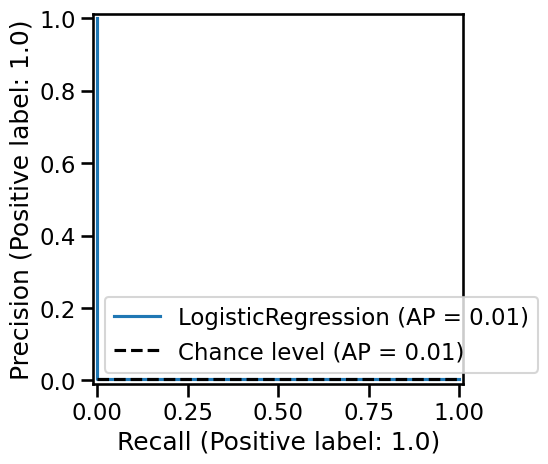

precision:  0.03335318642048839 
recall:  1.0 
random precision: 0.033373063170441


  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 7336.85it/s]


Area Under Precision-Recall Curve (AUPRC):  0.016676593210244194
EPR: 0.5180165289256199


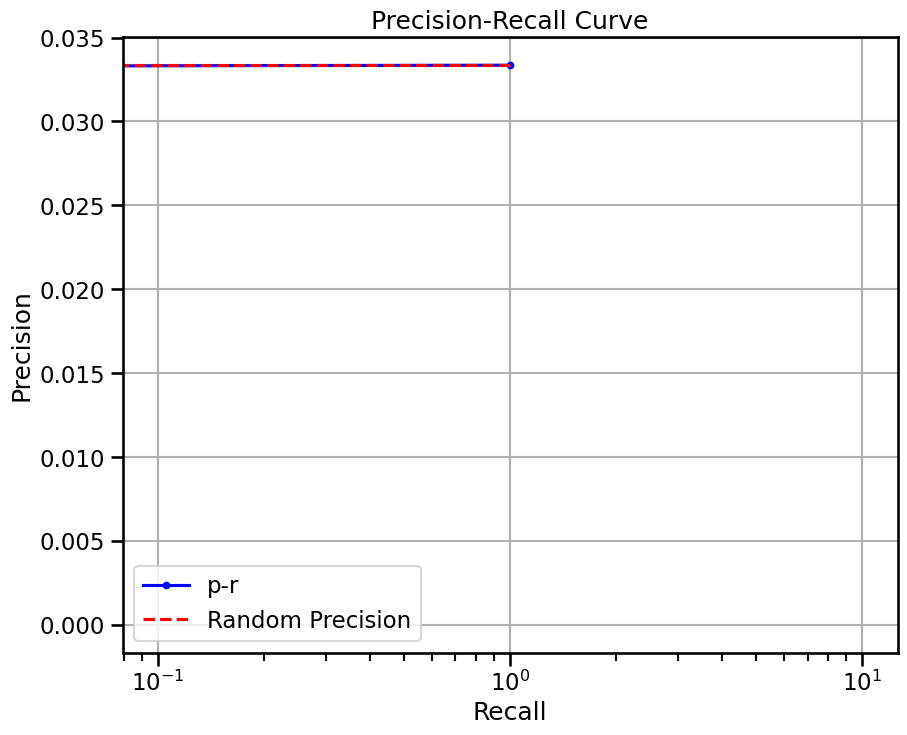

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 15.36 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.005956926836719108 
recall:  0.9512195121951219 
random precision: 0.006231003039513678


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: divide by zero encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 7602.41it/s]


Area Under Precision-Recall Curve (AUPRC):  0.006025488792613306
EPR: 0.0


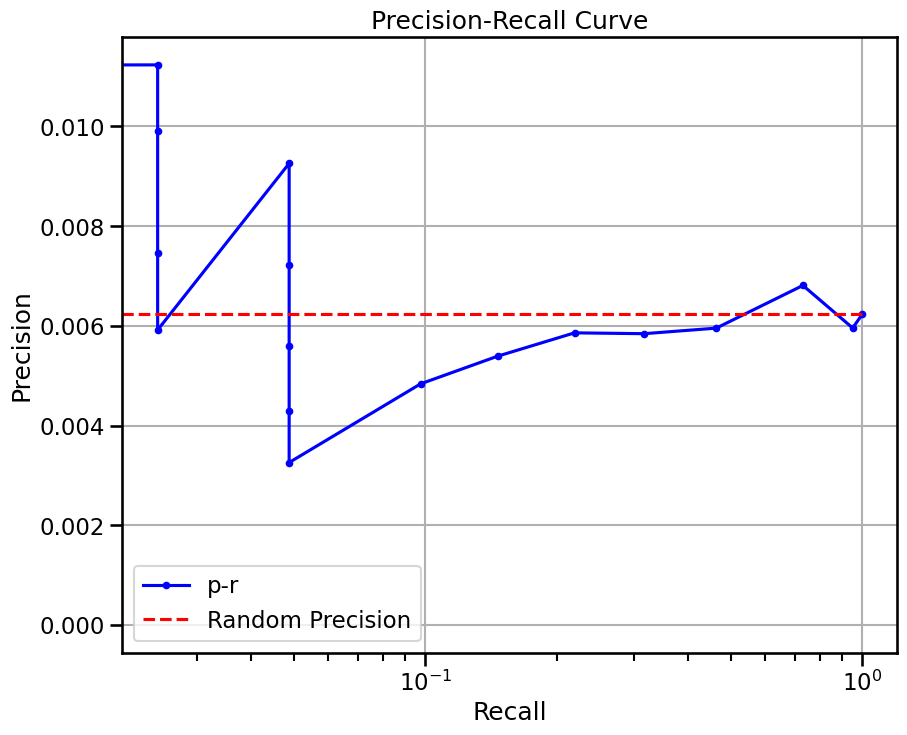

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 19.84 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.006283068783068783 
recall:  0.4634146341463415 
random precision: 0.006231003039513678


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: invalid value encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 10449.61it/s]


Area Under Precision-Recall Curve (AUPRC):  0.006085882639930777
EPR: 0.0


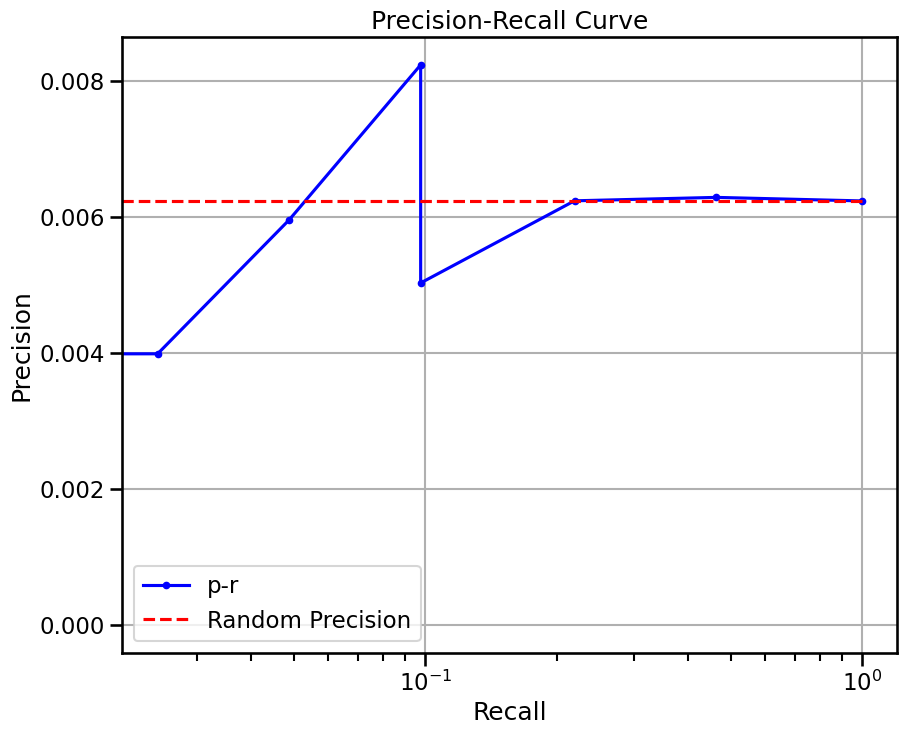

{'precision': 0.006283068783068783,
 'recall': 0.4634146341463415,
 'rand_precision': 0.006231003039513678,
 'auprc': 0.006085882639930777,
 'EPR': 0.0}

In [26]:
grn_inferer = GRNfer(model, adata,
    how="most var within",
    preprocess="softmax",
    head_agg='none',
    filtration="none",
    forward_mode="none",
    organisms=adata.obs['organism_ontology_term_id'][0],
    apc=False,
    symmetrize=False,
    num_genes=8000,
    max_cells=64,
    doplot=False,
    batch_size=32,
)
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.varp["classified"] = clf.predict_proba(
    grn.varp['GRN'].reshape(-1, grn.varp['GRN'].shape[-1])
).reshape(len(grn.var), len(grn.var), 2)[:, :, 1]
grn.varp['all'] = grn.varp['GRN']
grn.varp['GRN'] = grn.varp['classified']
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn.varp['GRN'] = grn.varp['all']
grn.var.index = grn.var['ensembl_id']
grn, m, _ = train_classifier(grn, other=preadata, C=0.1, train_size=0.3, class_weight={1: 100, 0: 1}, shuffle=False)
grn.varp['GRN'] = grn.varp['classified']
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn = compute_genie3(adata[:, adata.var.index.isin(grn_inferer.curr_genes)], nthreads=32, regulators=adata.var[adata.var.isTF].index.tolist())
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn = compute_genie3(adata[:, adata.var.index.isin(grn_inferer.curr_genes)], nthreads=32)
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)


/tmp/ipykernel_538653/791458349.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


number of expressed genes in this cell type: 6519


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 5317636, sparsity: 1.0


... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'symbol' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'description' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.03335318642048839 
recall:  1.0 
random precision: 0.033373063170441


  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 6257.42it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0381350447351807
EPR: 1.075445816186557


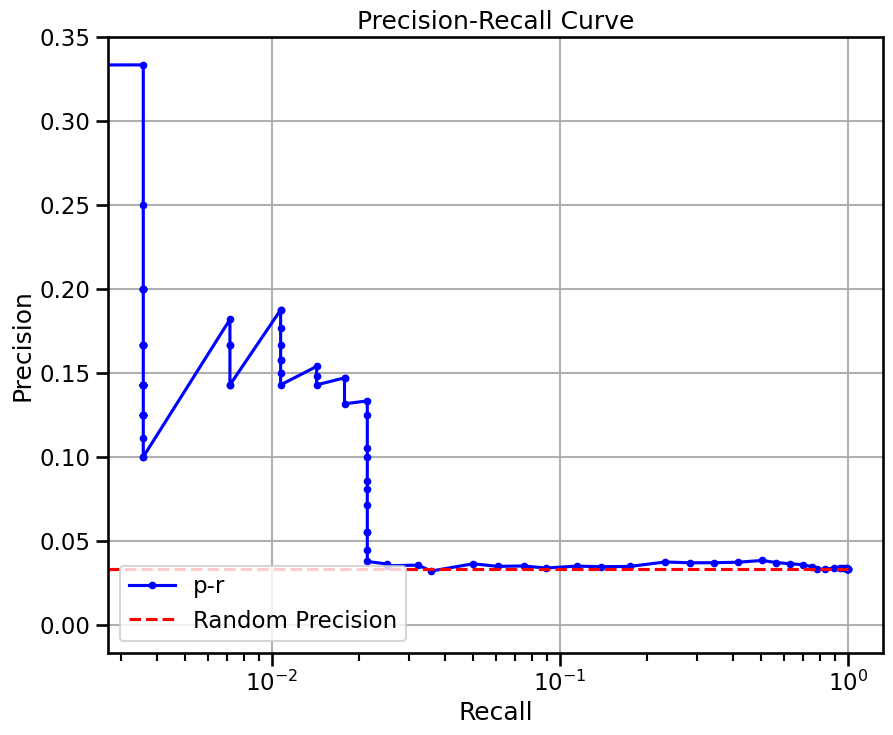

{'precision': 0.03335318642048839,
 'recall': 1.0,
 'rand_precision': 0.033373063170441,
 'auprc': 0.0381350447351807,
 'EPR': 1.075445816186557}

In [27]:
grn_inferer = GRNfer(model, adata,
    how="most var within",
    preprocess="softmax",
    head_agg='max',
    filtration="none",
    forward_mode="none",
    organisms=adata.obs['organism_ontology_term_id'][0],
    apc=False,
    symmetrize=False,
    num_genes=8000,
    max_cells=64,
    doplot=False,
    batch_size=32,
)
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

# Duren / all

In [9]:
preadata = get_sroy_gt(get="duren", species="mouse", gt="full")
adata = preprocessor(preadata.copy())
adata.var["isTF"]=False
adata.var.loc[adata.var.symbol.isin(grnutils.mTF), "isTF"]=True
preadata, (preadata.grn.sum(1)!=0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 464 renamining
filtered out 0 cells, 464 renamining
Removed 0 genes.
startin QC
Seeing 22 outliers (4.74% of total dataset):
done


(GRnnData object with n_obs × n_vars = 464 × 15299
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 7466 elements,
 44)

/tmp/ipykernel_538653/2251363804.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


number of expressed genes in this cell type: 14021


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.016632077832236795 
recall:  1.0 
random precision: 0.016634281340163693


  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 930.19it/s]


Area Under Precision-Recall Curve (AUPRC):  0.02731198755331439
EPR: 1.0939942456895984


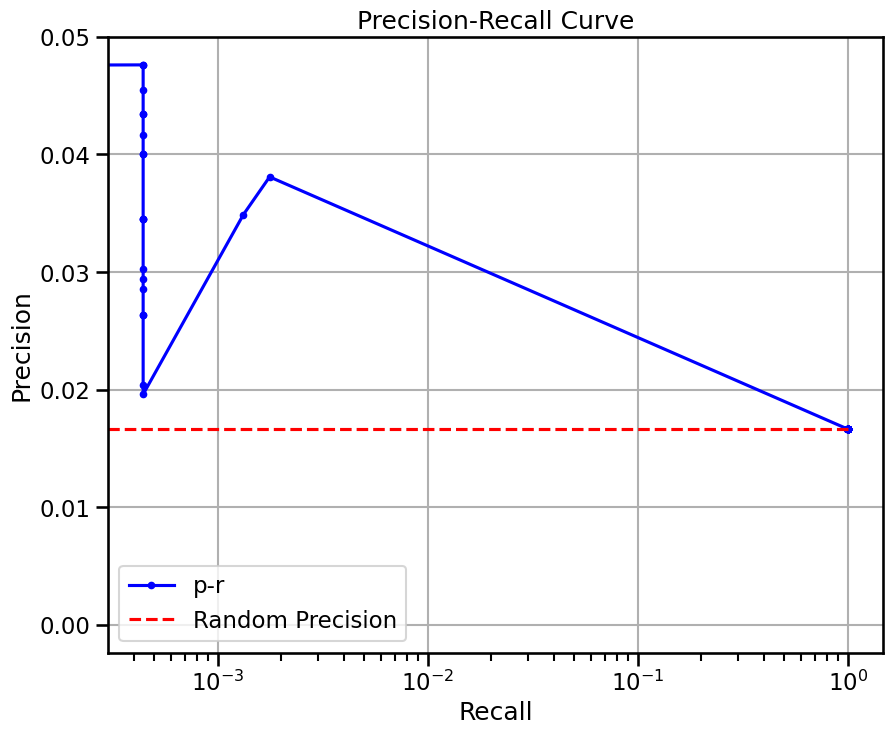

pred shape (18, 7549, 32)
true elem 2260 ...
doing regression....
metrics {'used_heads': 0, 'precision': 0.010387098130742867, 'random_precision': 0.010387098130742867, 'recall': 1.0, 'predicted_true': 95118.0, 'number_of_true': 988.0, 'epr': 0.0}


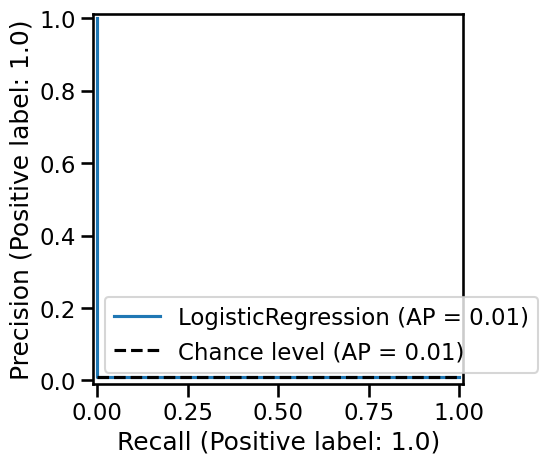

precision:  0.016632077832236795 
recall:  1.0 
random precision: 0.016634281340163693


  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1074.51it/s]


Area Under Precision-Recall Curve (AUPRC):  0.008316038916118398
EPR: 0.8741638570920747


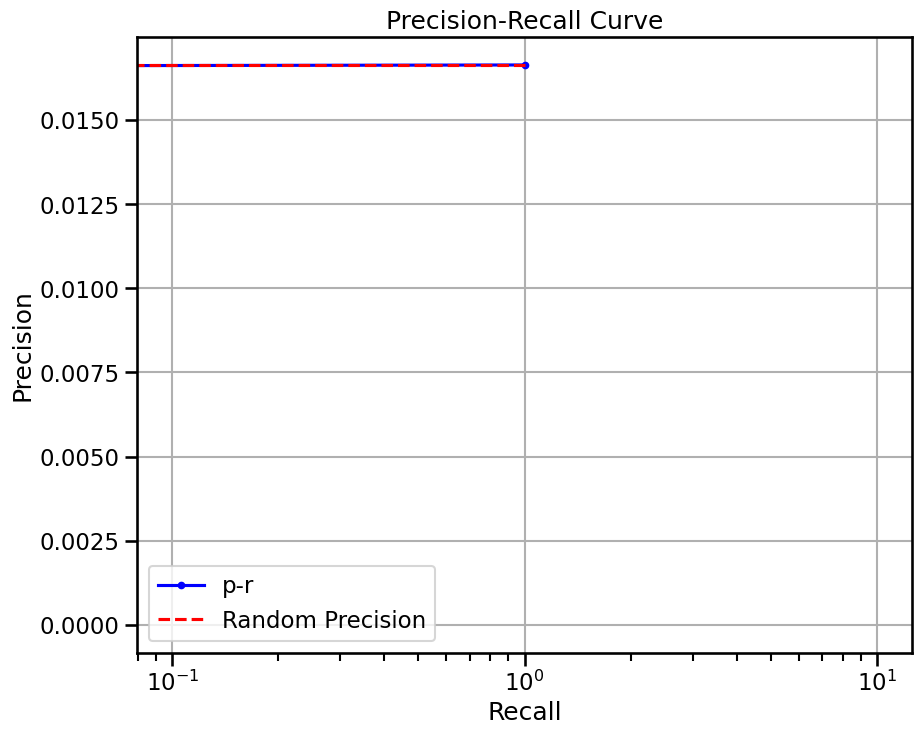

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 197.19 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.016938009308119516 
recall:  0.8663716814159292 
random precision: 0.016634281340163693


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: divide by zero encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1003.46it/s]


Area Under Precision-Recall Curve (AUPRC):  0.026305015674035308
EPR: 3.799821119740125


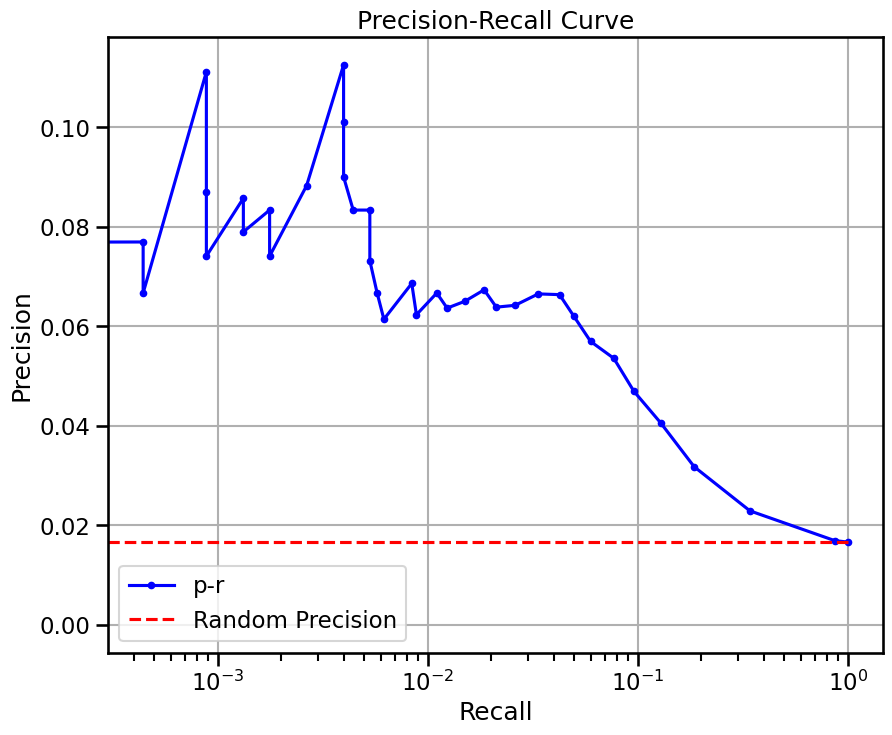

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 583.44 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.016715211629798735 
recall:  0.5637168141592921 
random precision: 0.016634281340163693


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: divide by zero encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1463.98it/s]


Area Under Precision-Recall Curve (AUPRC):  0.02301634014906863
EPR: 3.096821540412047


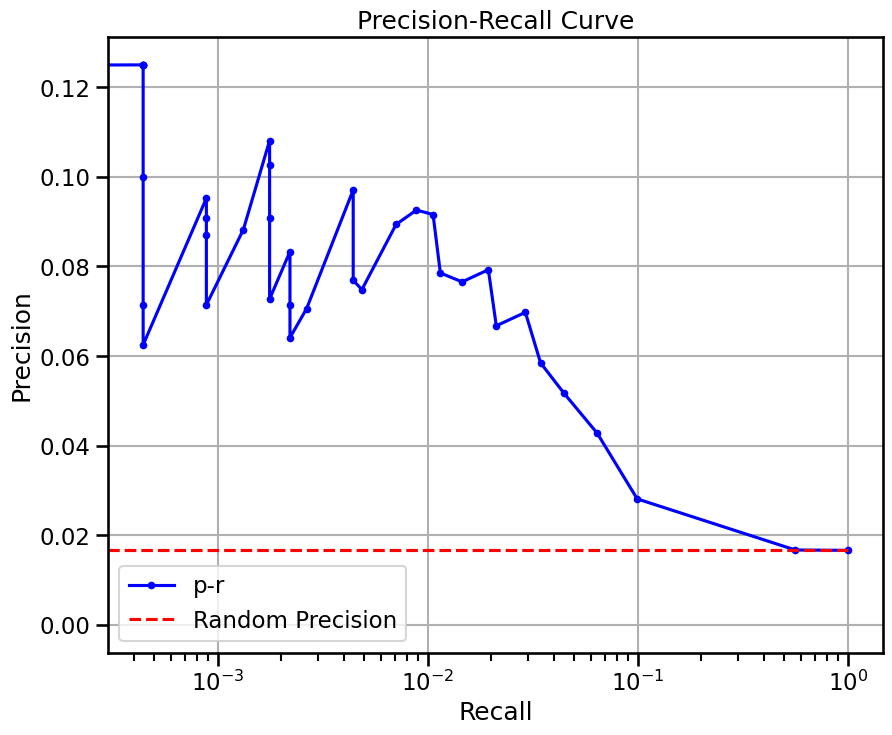

{'precision': 0.016715211629798735,
 'recall': 0.5637168141592921,
 'rand_precision': 0.016634281340163693,
 'auprc': 0.02301634014906863,
 'EPR': 3.096821540412047}

In [40]:
grn_inferer = GRNfer(model, adata,
    how="most var within",
    preprocess="softmax",
    head_agg='none',
    filtration="none",
    forward_mode="none",
    organisms=adata.obs['organism_ontology_term_id'][0],
    apc=False,
    symmetrize=False,
    num_genes=8000,
    max_cells=64,
    doplot=False,
    batch_size=32,
)
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.varp["classified"] = clf.predict_proba(
    grn.varp['GRN'].reshape(-1, grn.varp['GRN'].shape[-1])
).reshape(len(grn.var), len(grn.var), 2)[:, :, 1]
grn.varp['all'] = grn.varp['GRN']
grn.varp['GRN'] = grn.varp['classified']
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn.varp['GRN'] = grn.varp['all']
grn.var.index = grn.var['ensembl_id']
grn, m, _ = train_classifier(grn, other=preadata, C=0.1, train_size=0.3, class_weight={1: 100, 0: 1}, shuffle=False)
grn.varp['GRN'] = grn.varp['classified']
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn = compute_genie3(adata[:, adata.var.index.isin(grn_inferer.curr_genes)], nthreads=32, regulators=adata.var[adata.var.isTF].index.tolist())
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn = compute_genie3(adata[:, adata.var.index.isin(grn_inferer.curr_genes)], nthreads=32)
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)


/tmp/ipykernel_538653/791458349.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


number of expressed genes in this cell type: 7276


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 23687689, sparsity: 1.0


... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'symbol' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'description' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.027337335451045844 
recall:  1.0 
random precision: 0.02734543300301594


  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1613.48it/s]


Area Under Precision-Recall Curve (AUPRC):  0.029210328986993904
EPR: 1.3185838009985718


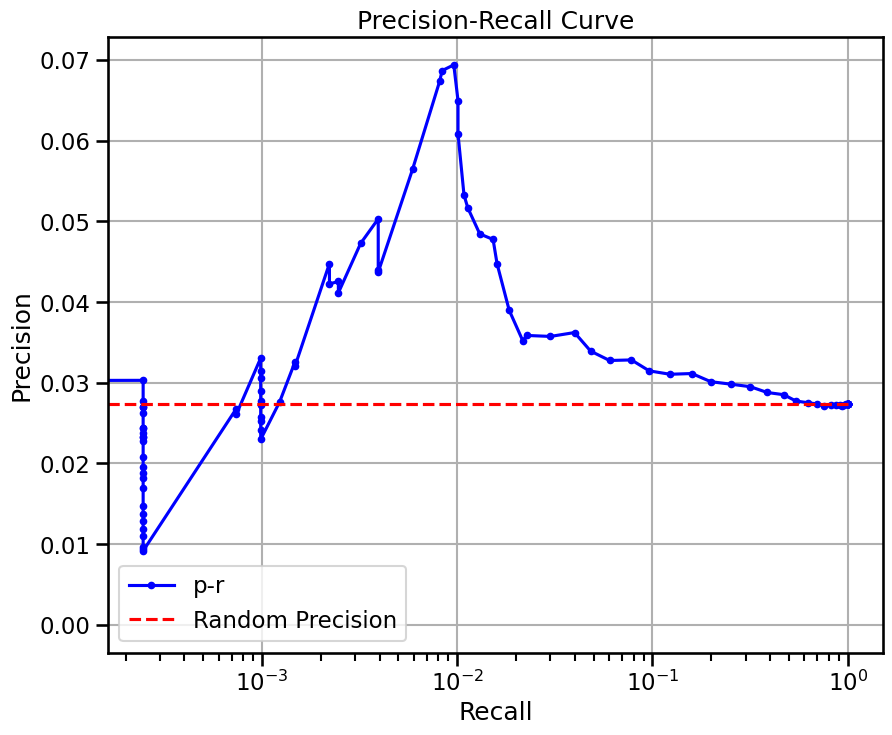

{'precision': 0.027337335451045844,
 'recall': 1.0,
 'rand_precision': 0.02734543300301594,
 'auprc': 0.029210328986993904,
 'EPR': 1.3185838009985718}

In [47]:
grn_inferer = GRNfer(model, adata,
    how="most var within",
    preprocess="softmax",
    head_agg='max',
    filtration="none",
    forward_mode="none",
    organisms=adata.obs['organism_ontology_term_id'][0],
    apc=False,
    symmetrize=False,
    num_genes=8000,
    max_cells=64,
    doplot=False,
    batch_size=32,
)
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

# semrau / all

In [10]:
preadata = get_sroy_gt(get="semrau", species="mouse", gt="full")
adata = preprocessor(preadata.copy())
adata.var["isTF"]=False
adata.var.loc[adata.var.symbol.isin(grnutils.mTF), "isTF"]=True
preadata, (preadata.grn.sum(1)!=0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 384 renamining
filtered out 0 cells, 384 renamining
Removed 0 genes.
startin QC
Seeing 35 outliers (9.11% of total dataset):
done


(GRnnData object with n_obs × n_vars = 384 × 10243
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 4404 elements,
 38)

/tmp/ipykernel_538653/1317776677.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


number of expressed genes in this cell type: 14021


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.016632077832236795 
recall:  1.0 
random precision: 0.016634281340163693


  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 949.86it/s]


Area Under Precision-Recall Curve (AUPRC):  0.02731198755331439
EPR: 1.0939942456895984


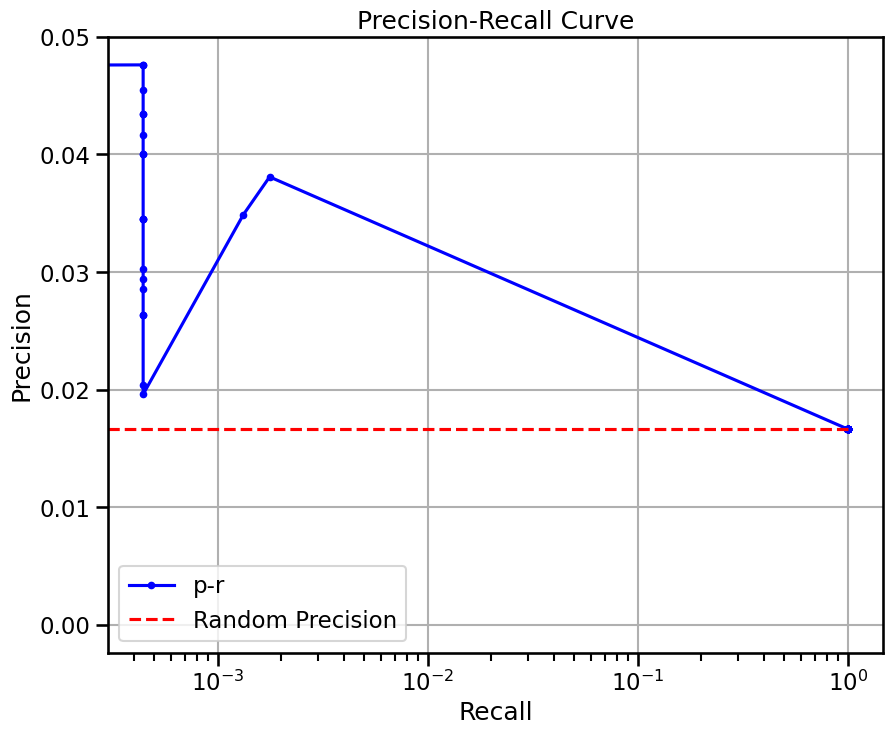

pred shape (18, 7549, 32)
true elem 2260 ...
doing regression....
metrics {'used_heads': 0, 'precision': 0.010387098130742867, 'random_precision': 0.010387098130742867, 'recall': 1.0, 'predicted_true': 95118.0, 'number_of_true': 988.0, 'epr': 0.0}


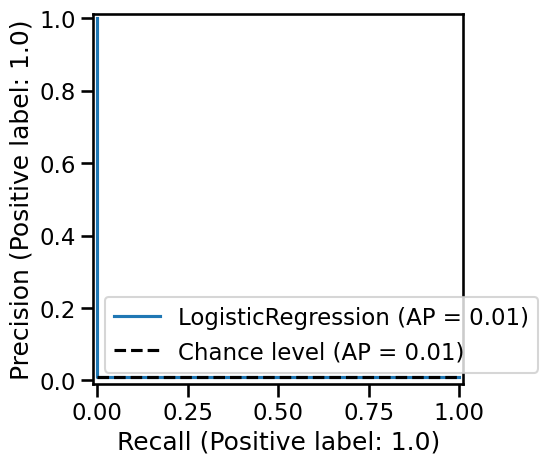

precision:  0.016632077832236795 
recall:  1.0 
random precision: 0.016634281340163693


  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1022.51it/s]


Area Under Precision-Recall Curve (AUPRC):  0.008316038916118398
EPR: 0.8741638570920747


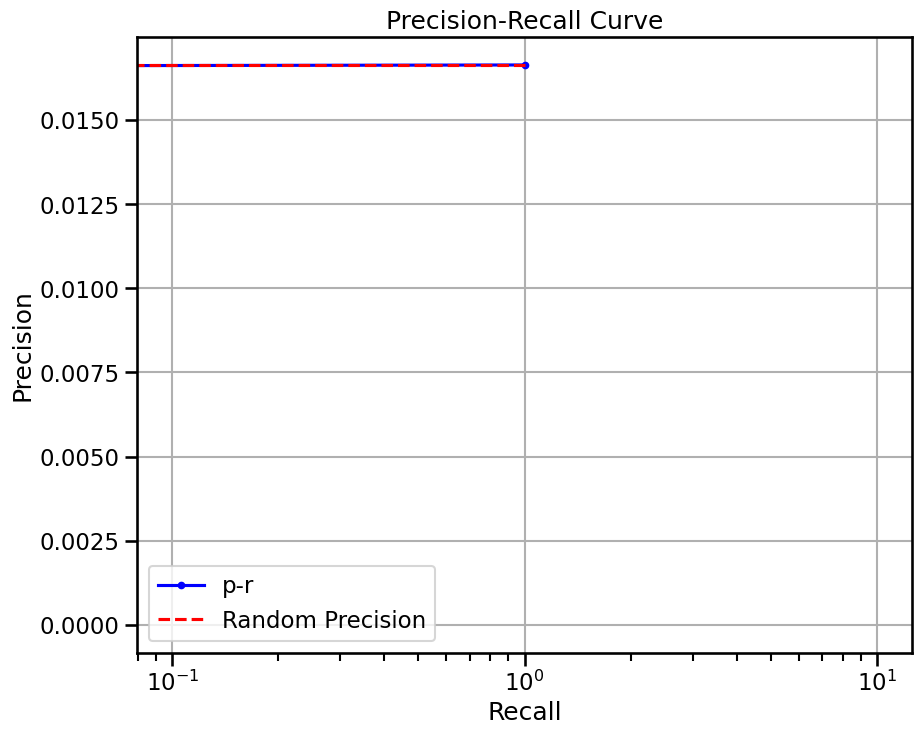

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 198.26 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.01693141824407876 
recall:  0.8663716814159292 
random precision: 0.016634281340163693


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: divide by zero encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1023.09it/s]


Area Under Precision-Recall Curve (AUPRC):  0.026391837142663924
EPR: 3.6698809523024543


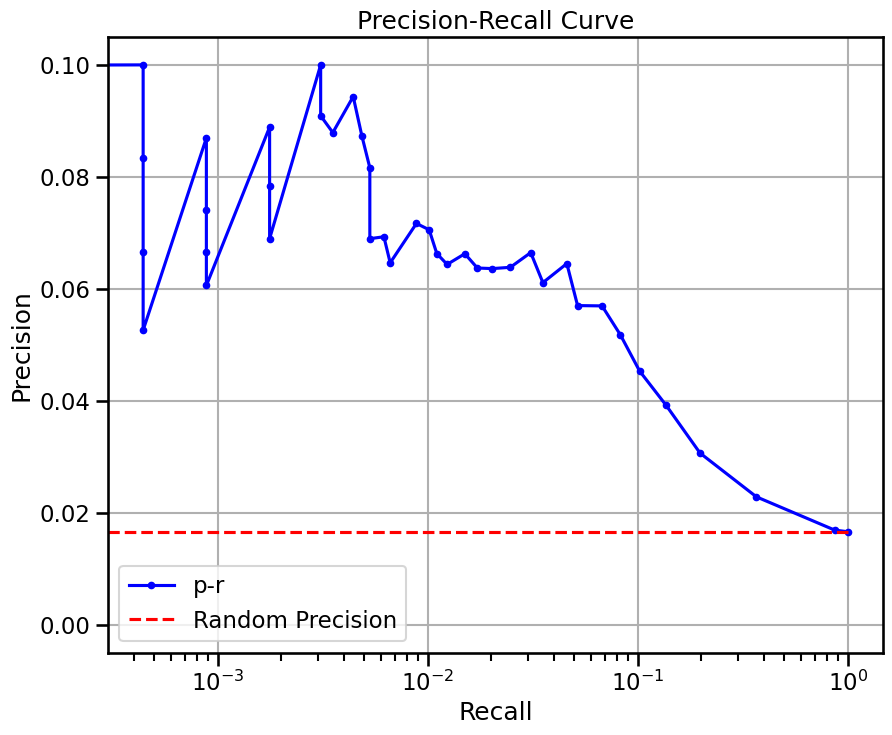

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 585.64 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.01673771889552043 
recall:  0.5646017699115045 
random precision: 0.016634281340163693


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: divide by zero encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1834.04it/s]


Area Under Precision-Recall Curve (AUPRC):  0.022900843055240365
EPR: 2.9720221144373684


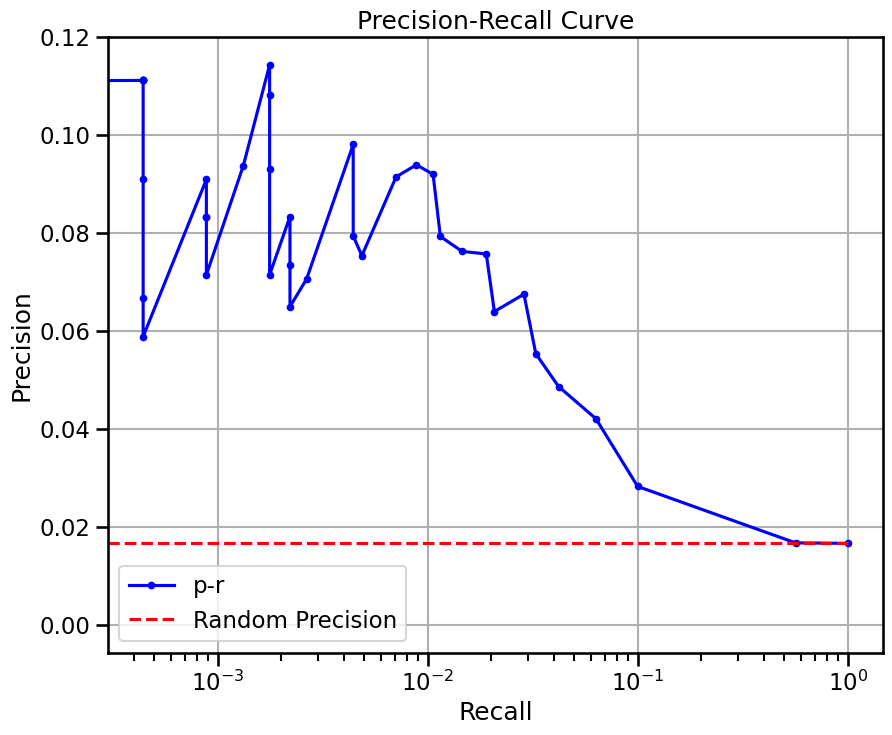

{'precision': 0.01673771889552043,
 'recall': 0.5646017699115045,
 'rand_precision': 0.016634281340163693,
 'auprc': 0.022900843055240365,
 'EPR': 2.9720221144373684}

In [41]:
grn_inferer = GRNfer(model, adata,
    how="most var within",
    preprocess="softmax",
    head_agg='none',
    filtration="none",
    forward_mode="none",
    organisms=adata.obs['organism_ontology_term_id'][0],
    apc=False,
    symmetrize=False,
    num_genes=8000,
    max_cells=64,
    doplot=False,
    batch_size=32,
)
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.varp["classified"] = clf.predict_proba(
    grn.varp['GRN'].reshape(-1, grn.varp['GRN'].shape[-1])
).reshape(len(grn.var), len(grn.var), 2)[:, :, 1]
grn.varp['all'] = grn.varp['GRN']
grn.varp['GRN'] = grn.varp['classified']
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn.varp['GRN'] = grn.varp['all']
grn.var.index = grn.var['ensembl_id']
grn, m, _= train_classifier(grn, other=preadata, C=0.1, train_size=0.3, class_weight={1: 100, 0: 1}, shuffle=False)
grn.varp['GRN'] = grn.varp['classified']
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn = compute_genie3(adata[:, adata.var.index.isin(grn_inferer.curr_genes)], nthreads=32, regulators=adata.var[adata.var.isTF].index.tolist())
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn = compute_genie3(adata[:, adata.var.index.isin(grn_inferer.curr_genes)], nthreads=32)
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)


/tmp/ipykernel_538653/791458349.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


number of expressed genes in this cell type: 14021


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 57153600, sparsity: 1.0


... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.016632077832236795 
recall:  1.0 
random precision: 0.016634281340163693


  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1986.30it/s]


Area Under Precision-Recall Curve (AUPRC):  0.01550284959879416
EPR: 0.9014699270001106


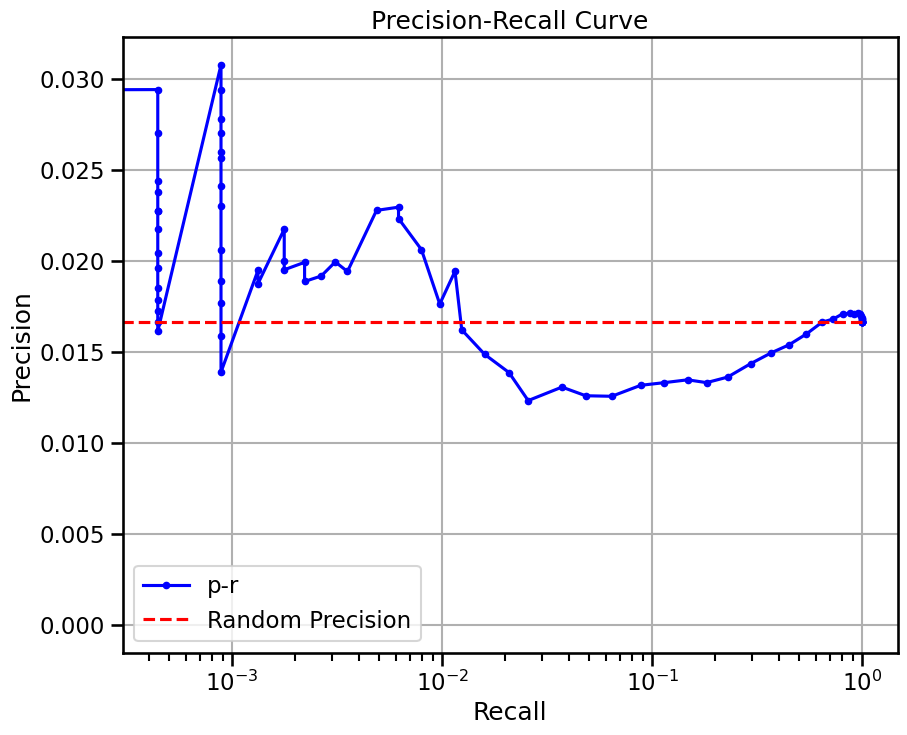

{'precision': 0.016632077832236795,
 'recall': 1.0,
 'rand_precision': 0.016634281340163693,
 'auprc': 0.01550284959879416,
 'EPR': 0.9014699270001106}

In [42]:
grn_inferer = GRNfer(model, adata,
    how="most var within",
    preprocess="softmax",
    head_agg='max',
    filtration="none",
    forward_mode="none",
    organisms=adata.obs['organism_ontology_term_id'][0],
    apc=False,
    symmetrize=False,
    num_genes=8000,
    max_cells=64,
    doplot=False,
    batch_size=32,
)
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

# semrau / chip

In [11]:
preadata = get_sroy_gt(get="semrau", species="mouse", gt="chip")
adata = preprocessor(preadata.copy())
adata.var["isTF"]=False
adata.var.loc[adata.var.symbol.isin(grnutils.mTF), "isTF"]=True
preadata, (preadata.grn.sum(1)!=0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 384 renamining
filtered out 0 cells, 384 renamining
Removed 0 genes.
startin QC
Seeing 35 outliers (9.11% of total dataset):
done


(GRnnData object with n_obs × n_vars = 384 × 10243
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 94145 elements,
 49)

/tmp/ipykernel_538653/2251363804.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


number of expressed genes in this cell type: 7276


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'symbol' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'description' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.17993041160793605 
recall:  1.0 
random precision: 0.1799837085308057


  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1684.88it/s]


Area Under Precision-Recall Curve (AUPRC):  0.20350224358369962
EPR: 1.1612465146233635


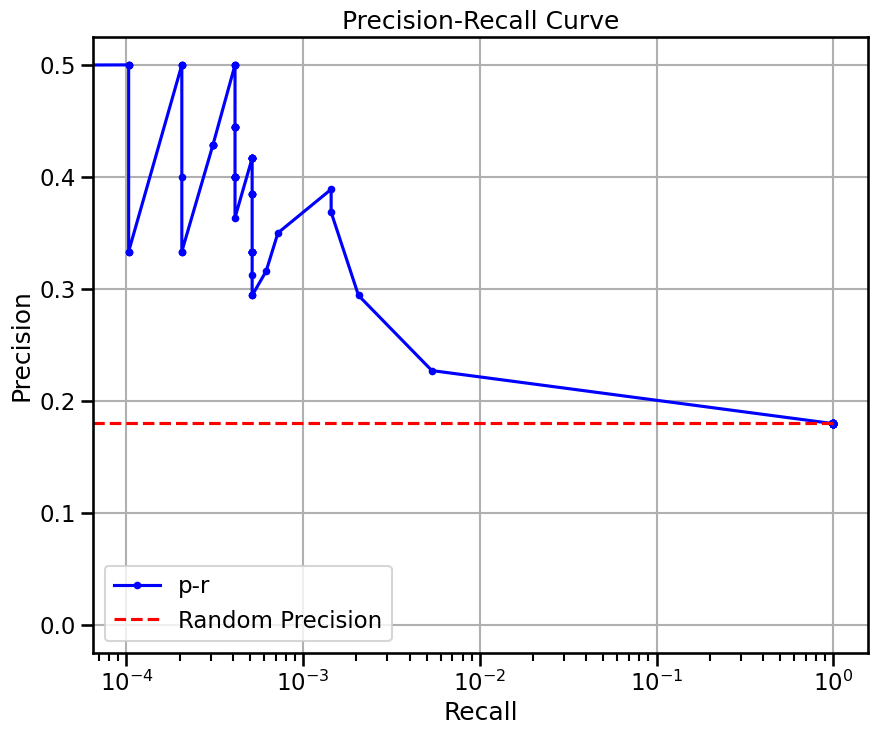

pred shape (16, 3377, 32)
true elem 9722 ...
doing regression....
metrics {'used_heads': 0, 'precision': 0.19279274515506437, 'random_precision': 0.19279274515506437, 'recall': 1.0, 'predicted_true': 37823.0, 'number_of_true': 7292.0, 'epr': 1.9177185225921591}


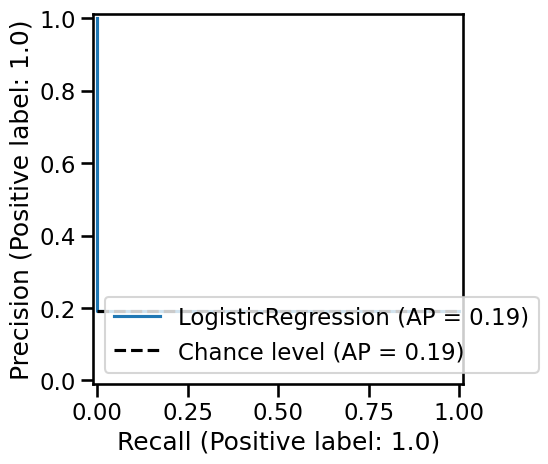

precision:  0.17993041160793605 
recall:  1.0 
random precision: 0.1799837085308057


  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1537.85it/s]


Area Under Precision-Recall Curve (AUPRC):  0.08996520580396802
EPR: 0.975697513501351


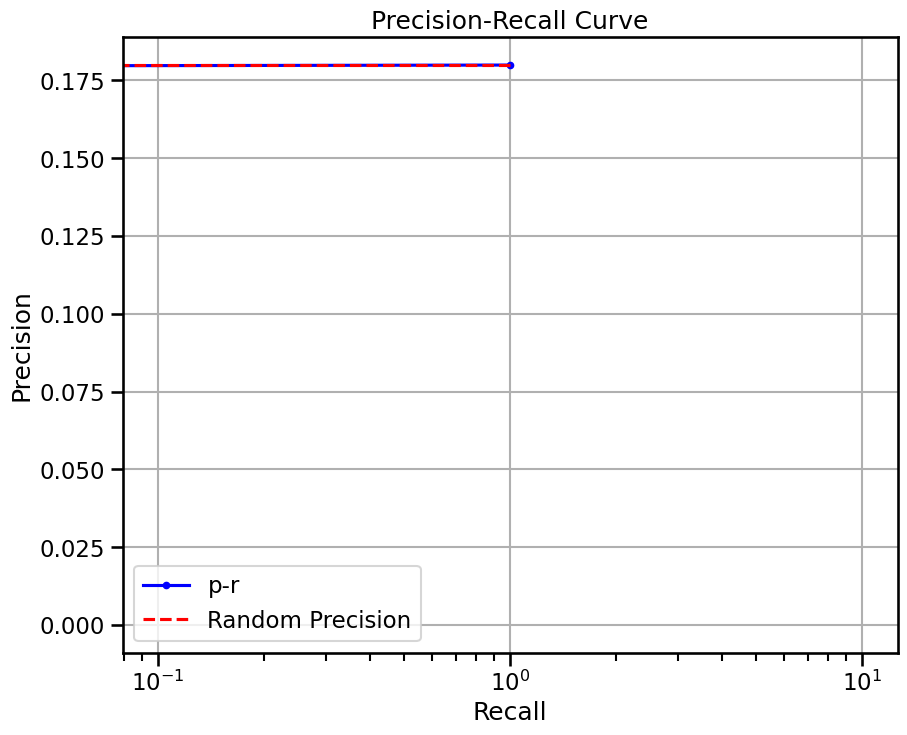

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 30.58 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.20010262817366473 
recall:  0.9225468010697387 
random precision: 0.1799837085308057


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: invalid value encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1547.73it/s]


Area Under Precision-Recall Curve (AUPRC):  0.21278114159842038
EPR: 1.4383627006891722


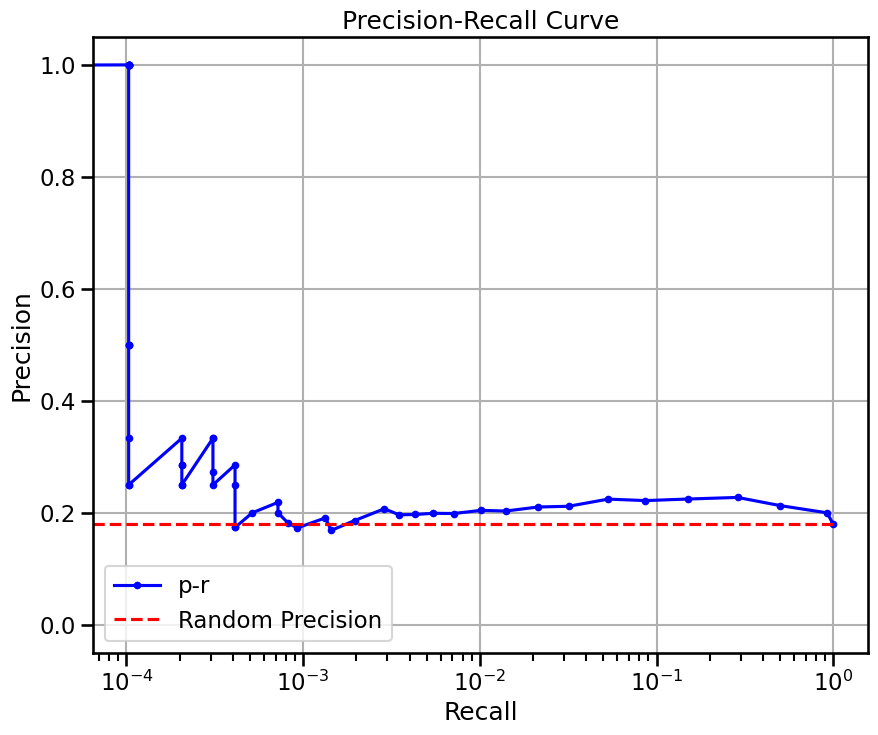

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 32 threads
Elapsed time: 50.31 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=32>
  _warn(f"unclosed running multiprocessing pool {self!r}",


precision:  0.1997701834276716 
recall:  0.4828224645134746 
random precision: 0.1799837085308057


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: invalid value encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1487.36it/s]


Area Under Precision-Recall Curve (AUPRC):  0.19172504817905334
EPR: 1.1556673213286044


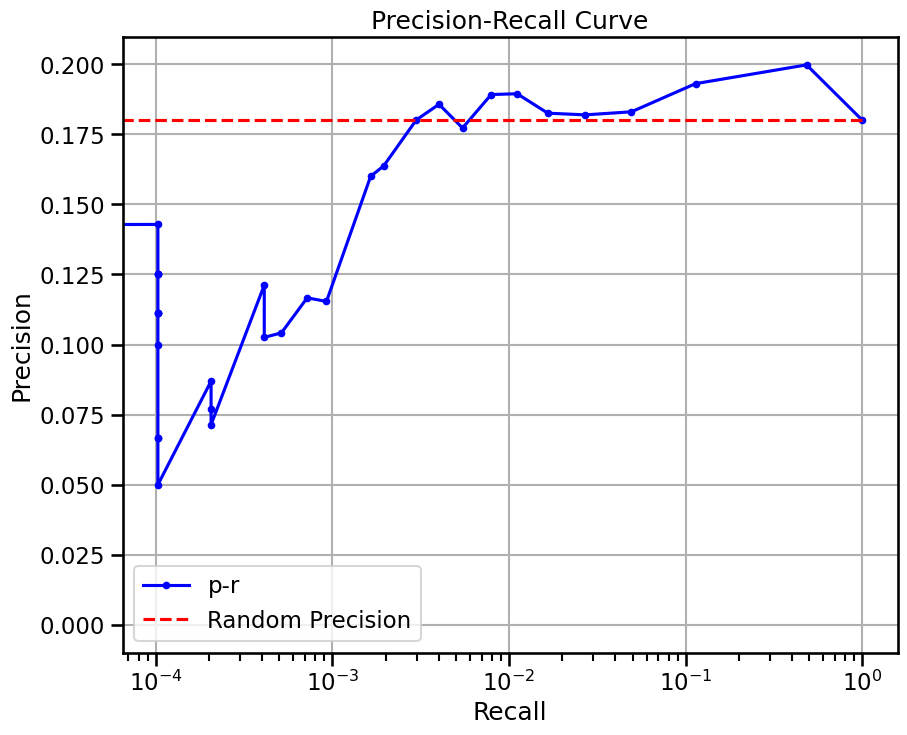

{'precision': 0.1997701834276716,
 'recall': 0.4828224645134746,
 'rand_precision': 0.1799837085308057,
 'auprc': 0.19172504817905334,
 'EPR': 1.1556673213286044}

In [44]:
grn_inferer = GRNfer(model, adata,
    how="most var within",
    preprocess="softmax",
    head_agg='none',
    filtration="none",
    forward_mode="none",
    organisms=adata.obs['organism_ontology_term_id'][0],
    apc=False,
    symmetrize=False,
    num_genes=8000,
    max_cells=64,
    doplot=False,
    batch_size=32,
)
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.varp["classified"] = clf.predict_proba(
    grn.varp['GRN'].reshape(-1, grn.varp['GRN'].shape[-1])
).reshape(len(grn.var), len(grn.var), 2)[:, :, 1]
grn.varp['all'] = grn.varp['GRN']
grn.varp['GRN'] = grn.varp['classified']
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn.varp['GRN'] = grn.varp['all']
grn.var.index = grn.var['ensembl_id']
grn, m, _ = train_classifier(grn, other=preadata, C=0.1, train_size=0.3, class_weight={1: 100, 0: 1}, shuffle=False)
grn.varp['GRN'] = grn.varp['classified']
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn = compute_genie3(adata[:, adata.var.index.isin(grn_inferer.curr_genes)], nthreads=32, regulators=adata.var[adata.var.isTF].index.tolist())
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn = compute_genie3(adata[:, adata.var.index.isin(grn_inferer.curr_genes)], nthreads=32)
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)


/tmp/ipykernel_538653/791458349.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


number of expressed genes in this cell type: 7276


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 23687689, sparsity: 1.0


... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'symbol' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'description' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.17993041160793605 
recall:  1.0 
random precision: 0.1799837085308057


  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1514.13it/s]


Area Under Precision-Recall Curve (AUPRC):  0.18848823397331255
EPR: 1.0432058442064611


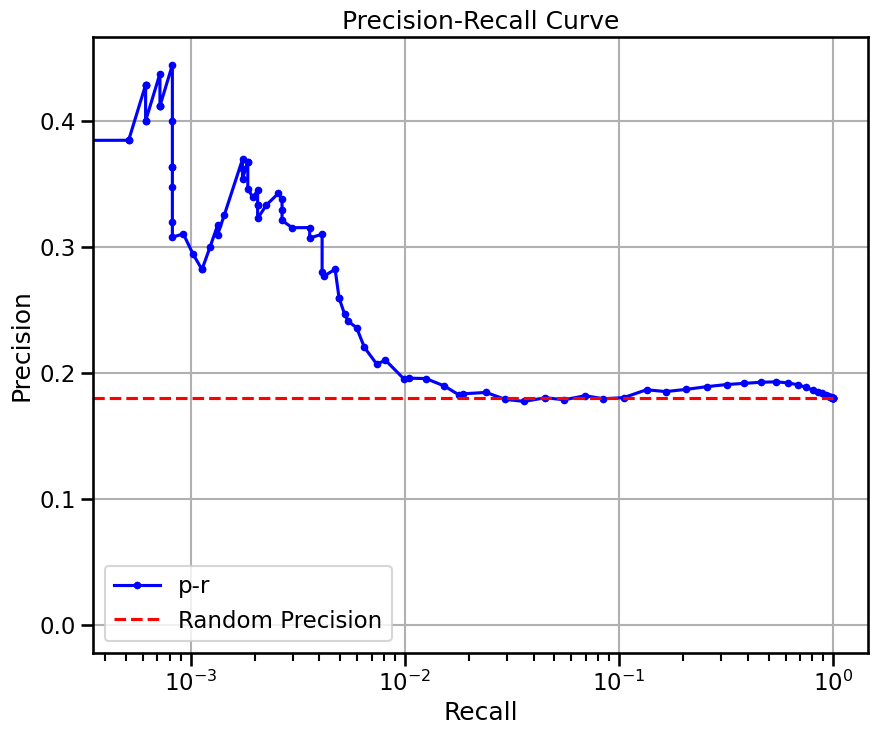

{'precision': 0.17993041160793605,
 'recall': 1.0,
 'rand_precision': 0.1799837085308057,
 'auprc': 0.18848823397331255,
 'EPR': 1.0432058442064611}

In [45]:
grn_inferer = GRNfer(model, adata,
    how="most var within",
    preprocess="softmax",
    head_agg='max',
    filtration="none",
    forward_mode="none",
    organisms=adata.obs['organism_ontology_term_id'][0],
    apc=False,
    symmetrize=False,
    num_genes=8000,
    max_cells=64,
    doplot=False,
    batch_size=32,
)
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

# semrau / ko

In [12]:
preadata = get_sroy_gt(get="semrau", species="mouse", gt="ko")
adata = preprocessor(preadata.copy())
adata.var["isTF"]=False
adata.var.loc[adata.var.symbol.isin(grnutils.mTF), "isTF"]=True
preadata, (preadata.grn.sum(1)!=0).sum()

/home/ml4ig1/Documents code/GRnnData/grnndata/GRNAnnData.py:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(varnames), len(varnames)), dtype=np.float)


Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 384 renamining
filtered out 0 cells, 384 renamining
Removed 0 genes.
startin QC
Seeing 35 outliers (9.11% of total dataset):
done


(GRnnData object with n_obs × n_vars = 384 × 10243
     obs: 'dataset', 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 39782 elements,
 125)

/tmp/ipykernel_576316/727338117.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],


Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


number of expressed genes in this cell type: 7276


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  ) < LooseVersion("1.15"):
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

... storing 'dataset' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'symbol' as categorical
... storing 'ncbi_gene_ids' as categorical
... storing 'biotype' as categorical
... storing 'description' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


pred shape (44, 3377, 32)
true elem 4062 ...
doing regression....
metrics {'used_heads': 3, 'precision': 0.029948467484521017, 'random_precision': 0.029948467484521017, 'recall': 1.0, 'predicted_true': 104012.0, 'number_of_true': 3115.0, 'epr': 1.0652975246079266}


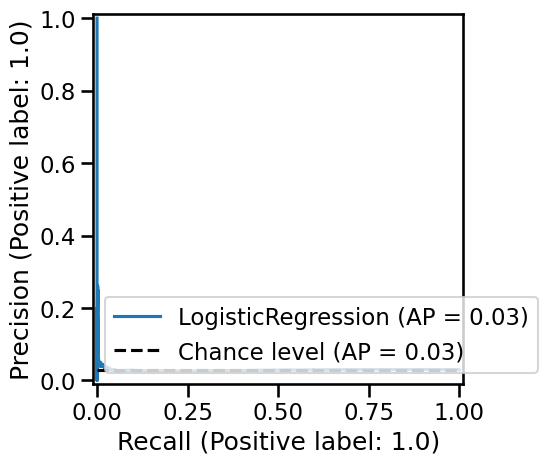

ValueError: too many values to unpack (expected 2)

In [13]:
grn_inferer = GRNfer(model, adata,
    how="most var within",
    preprocess="softmax",
    head_agg='none',
    filtration="none",
    forward_mode="none",
    organisms=adata.obs['organism_ontology_term_id'][0],
    apc=False,
    symmetrize=False,
    num_genes=8000,
    max_cells=64,
    doplot=False,
    batch_size=32,
)
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.varp["classified"] = clf.predict_proba(
    grn.varp['GRN'].reshape(-1, grn.varp['GRN'].shape[-1])
).reshape(len(grn.var), len(grn.var), 2)[:, :, 1]
grn.varp['all'] = grn.varp['GRN']
grn.varp['GRN'] = grn.varp['classified']
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)
#
#grn.varp['GRN'] = grn.varp['all']
#grn.var.index = grn.var['ensembl_id']
grn, m = train_classifier(grn, other=preadata, C=0.1, train_size=0.3, class_weight={1: 100, 0: 1}, shuffle=False)
grn.varp['GRN'] = grn.varp['classified']
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)


In [ ]:
grn = compute_genie3(adata[:, adata.var.index.isin(grn_inferer.curr_genes)], nthreads=32, regulators=adata.var[adata.var.isTF].index.tolist())
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

grn = compute_genie3(adata[:, adata.var.index.isin(grn_inferer.curr_genes)], nthreads=32)
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

In [ ]:
grn_inferer = GRNfer(model, adata,
    how="most var within",
    preprocess="softmax",
    head_agg='max',
    filtration="none",
    forward_mode="none",
    organisms=adata.obs['organism_ontology_term_id'][0],
    apc=False,
    symmetrize=False,
    num_genes=8000,
    max_cells=64,
    doplot=False,
    batch_size=32,
)
grn = grn_inferer(layer=list(range(model.nlayers))[:])
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)